In [1]:
import pandas as pd
import math
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm

In [2]:
# Read in AMF catalog
amf = pd.read_csv('dr9_main_complete.csv', header=None)
amf.columns = ['amf_no','amf_ra','amf_dec','amf_z','amf_lk','amf_rh','amf_r200','amf_rc','amf_c','amf_str_rh','bax_id','mcxc_id','red_id','whl_id']

c = SkyCoord(amf['amf_ra'],amf['amf_dec'],frame='icrs',unit='deg')
amf['glat'] = c.galactic.b.degree
amf['glon'] = c.galactic.l.degree

amf_whl_red = amf[(amf.whl_id!='-9999') & (amf.red_id!='-9999')]

In [3]:
hdul = fits.open("../overlaps/masks/DR5_cluster-catalog_v1.1.fits")
data = hdul[1].data

adv = pd.DataFrame({'name':data['name'].byteswap().newbyteorder(),
                    'RA':data['RADeg'].byteswap().newbyteorder(),
                    'dec':data['decDeg'].byteswap().newbyteorder(),
                    'SNR':data['SNR'].byteswap().newbyteorder(),
                    'redshift':data['redshift'].byteswap().newbyteorder(),
                    'RM':data['RM'].byteswap().newbyteorder()})

c = SkyCoord(adv['RA'],adv['dec'],frame='icrs',unit='deg')
adv['glat'] = c.galactic.b.degree
adv['glon'] = c.galactic.l.degree

In [4]:
arw_not_adv = pd.DataFrame()
arw_not_adv = pd.DataFrame(data=arw_not_adv, columns=amf_whl_red.columns)

In [ ]:
arw_not_adv = arw_not_adv.iloc[0:0]

for i in tqdm(range(amf_whl_red.shape[0])):
    matches = adv.loc[(adv['glat'].sub(amf_whl_red.iloc[i]['glat']).abs()<1) & (adv['glon'].sub(amf_whl_red.iloc[i]['glon']).abs()<1)]
    if len(matches)==0:     
        arw_not_adv.loc[len(arw_not_adv)] = amf_whl_red.iloc[i]
        
arw_not_adv = arw_not_adv.reset_index()
print(len(arw_not_adv))
print(len(arw_not_adv[arw_not_adv.amf_rh>50]))

---

In [ ]:
actmap = enmap.read_map("act_dr5.01_s08s18_AA_f090_daynight_map.fits")

In [6]:
# actmap_hp = reproject.healpix_from_enmap(actmap[0],nside=2048,lmax=6000)
# cmb = hp.read_map("COM_CMB_IQU-smica_2048_R3.00_full.fits")
# actmap_not_cmb = actmap_hp-cmb

# hp.mollview(actmap_hp,norm='hist',title='Masked S/N map')

In [7]:
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

In [8]:
# eshow(comptony, **{'downgrade': 4, 'ticks': 4, 'colorbar': True})
# eshow(comptony, **{"sub": "0:5 ,-180:-160", 'ticks': 4, "downgrade": 4, "colorbar": True})

  0%|          | 0/2761 [00:00<?, ?it/s]

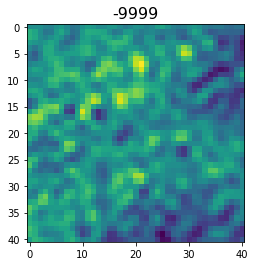

  0%|          | 1/2761 [00:00<07:22,  6.24it/s]

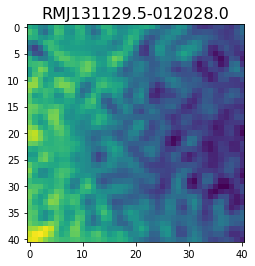

  0%|          | 3/2761 [00:00<04:22, 10.51it/s]

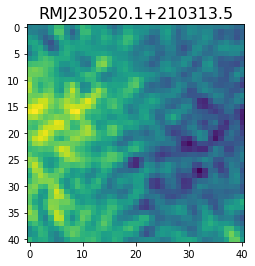

  0%|          | 5/2761 [00:00<03:48, 12.05it/s]

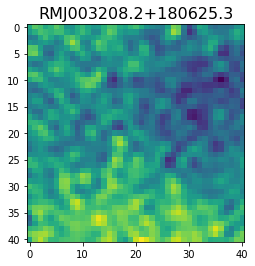

  0%|          | 7/2761 [00:00<03:33, 12.93it/s]

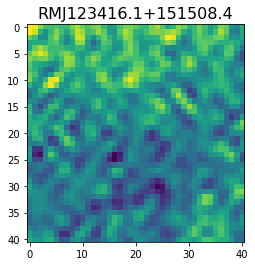

  0%|          | 9/2761 [00:00<03:22, 13.57it/s]

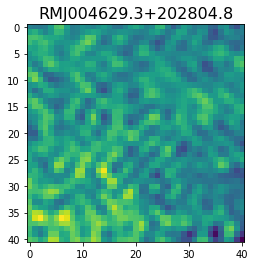

  0%|          | 12/2761 [00:00<02:53, 15.83it/s]

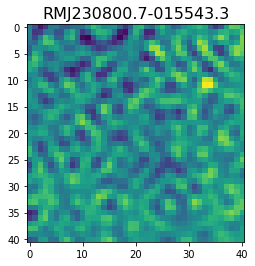

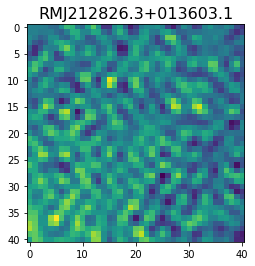

  1%|          | 14/2761 [00:01<03:45, 12.19it/s]

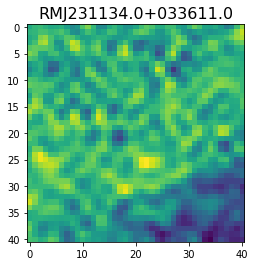

  1%|          | 16/2761 [00:01<03:33, 12.86it/s]

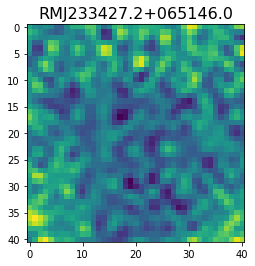

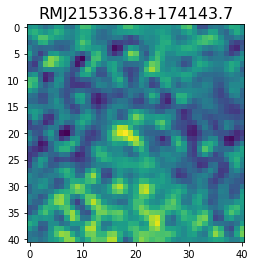

  1%|          | 18/2761 [00:01<04:08, 11.03it/s]

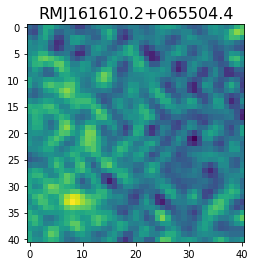

  1%|          | 20/2761 [00:01<03:50, 11.87it/s]

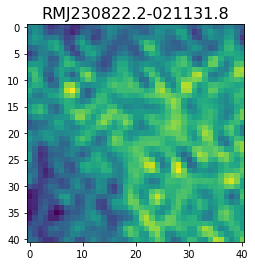

  1%|          | 23/2761 [00:01<03:39, 12.49it/s]

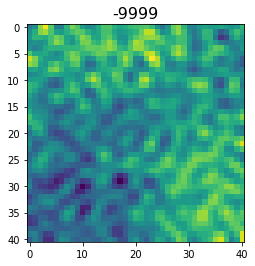

  1%|          | 25/2761 [00:01<03:28, 13.14it/s]

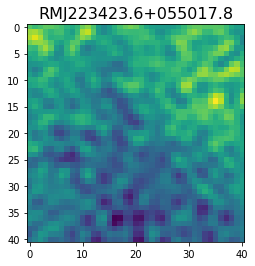

  1%|          | 27/2761 [00:02<03:20, 13.66it/s]

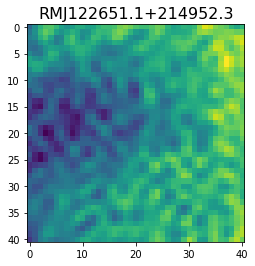

  1%|          | 29/2761 [00:02<03:12, 14.20it/s]

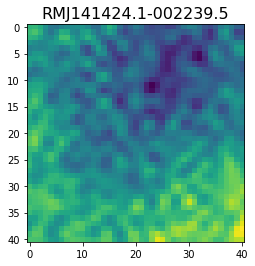

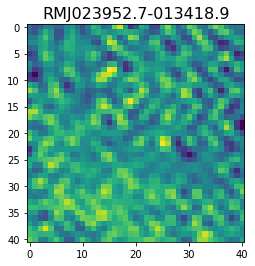

  1%|          | 31/2761 [00:02<03:48, 11.96it/s]

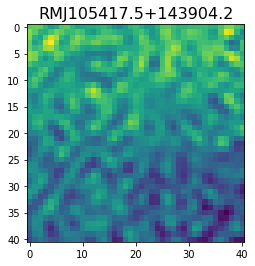

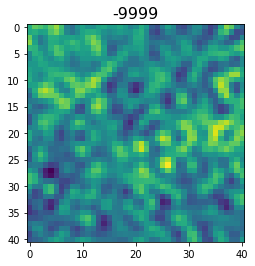

  1%|          | 33/2761 [00:02<04:14, 10.71it/s]

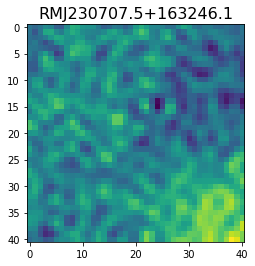

  1%|▏         | 35/2761 [00:02<03:53, 11.68it/s]

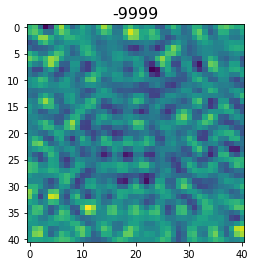

  1%|▏         | 37/2761 [00:02<03:37, 12.53it/s]

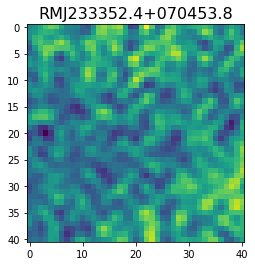

  1%|▏         | 39/2761 [00:03<03:27, 13.12it/s]

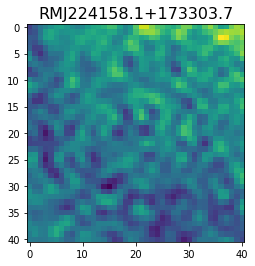

  1%|▏         | 41/2761 [00:03<03:19, 13.65it/s]

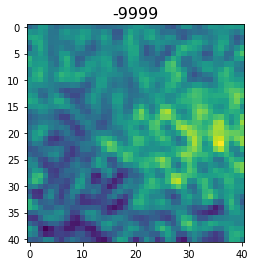

  2%|▏         | 45/2761 [00:03<02:39, 17.07it/s]

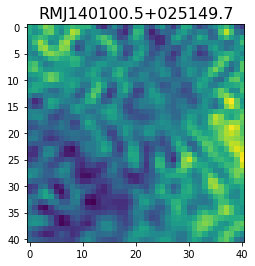

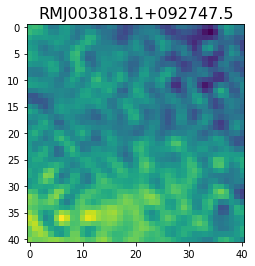

  2%|▏         | 47/2761 [00:03<03:43, 12.13it/s]

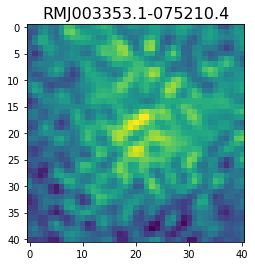

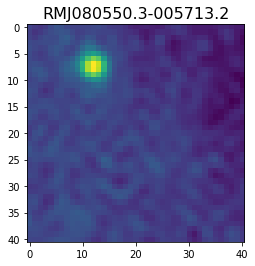

  2%|▏         | 49/2761 [00:03<04:07, 10.97it/s]

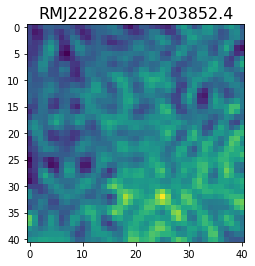

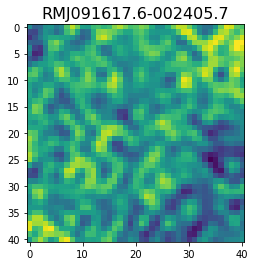

  2%|▏         | 51/2761 [00:04<04:26, 10.18it/s]

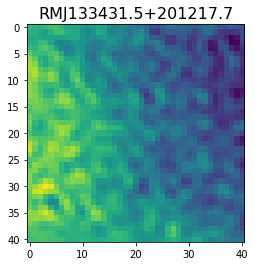

  2%|▏         | 53/2761 [00:04<04:02, 11.18it/s]

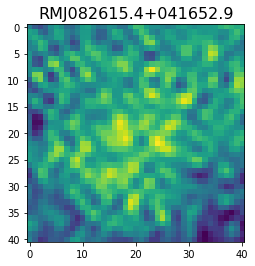

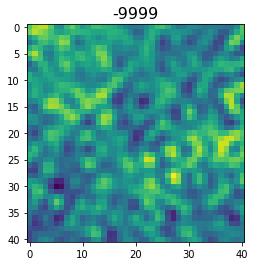

  2%|▏         | 55/2761 [00:04<04:23, 10.28it/s]

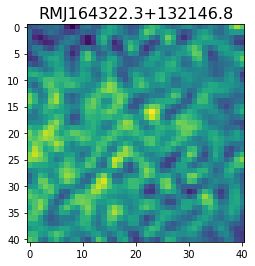

  2%|▏         | 57/2761 [00:04<03:59, 11.29it/s]

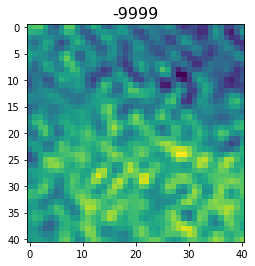

  2%|▏         | 61/2761 [00:04<03:00, 14.93it/s]

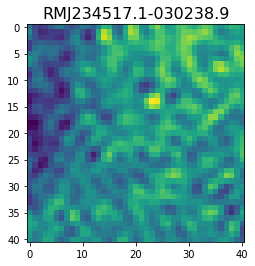

  2%|▏         | 63/2761 [00:04<03:01, 14.86it/s]

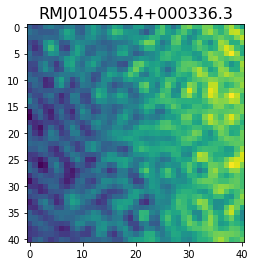

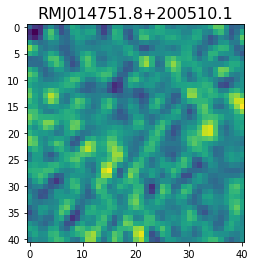

  2%|▏         | 65/2761 [00:05<04:01, 11.15it/s]

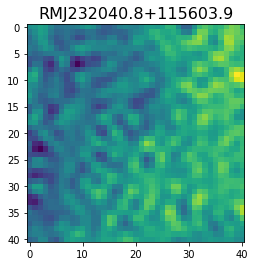

  2%|▏         | 67/2761 [00:05<03:45, 11.95it/s]

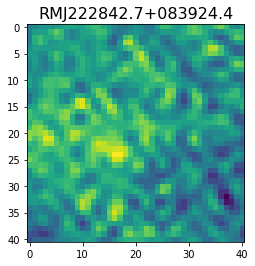

  3%|▎         | 70/2761 [00:05<03:11, 14.02it/s]

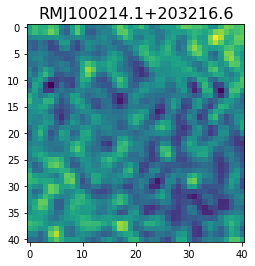

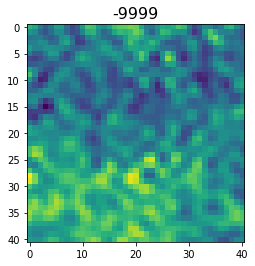

  3%|▎         | 72/2761 [00:05<03:43, 12.05it/s]

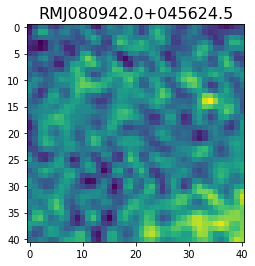

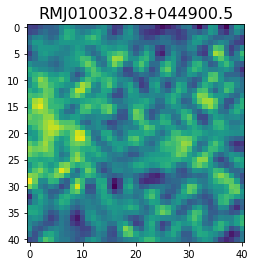

  3%|▎         | 74/2761 [00:06<04:05, 10.96it/s]

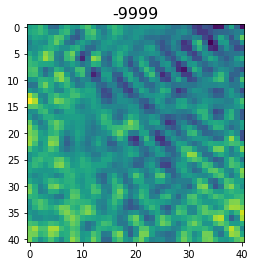

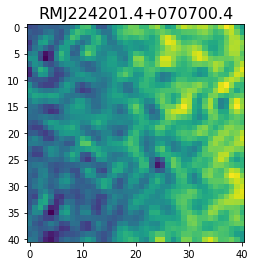

  3%|▎         | 76/2761 [00:06<04:20, 10.32it/s]

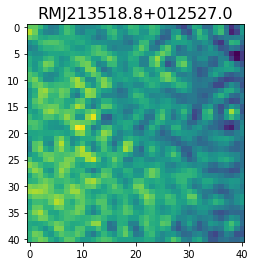

  3%|▎         | 78/2761 [00:06<03:56, 11.36it/s]

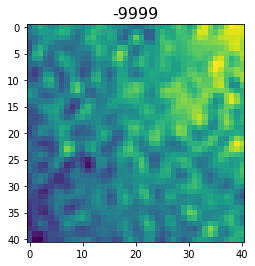

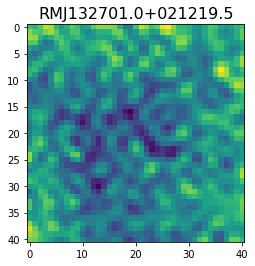

  3%|▎         | 87/2761 [00:06<02:09, 20.65it/s]

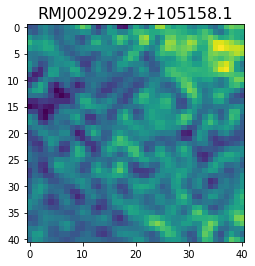

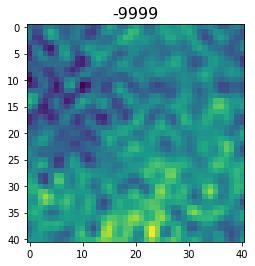

  3%|▎         | 90/2761 [00:07<02:50, 15.66it/s]

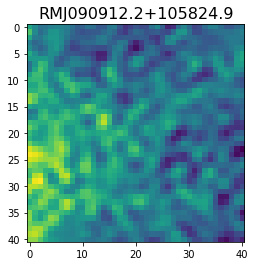

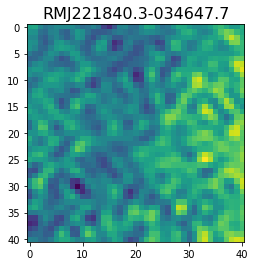

  3%|▎         | 93/2761 [00:07<03:03, 14.51it/s]

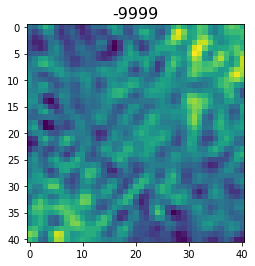

  3%|▎         | 95/2761 [00:07<03:02, 14.62it/s]

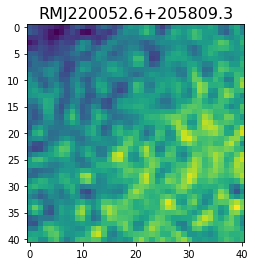

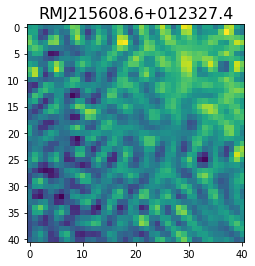

  4%|▎         | 97/2761 [00:07<03:31, 12.58it/s]

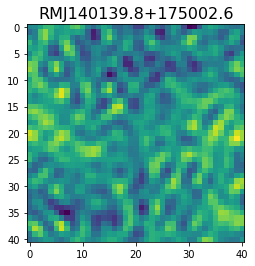

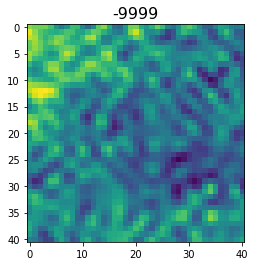

  4%|▎         | 99/2761 [00:07<03:54, 11.38it/s]

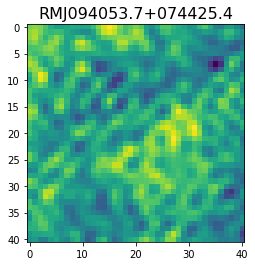

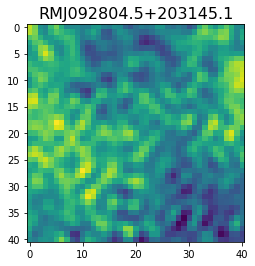

  4%|▎         | 101/2761 [00:08<04:11, 10.56it/s]

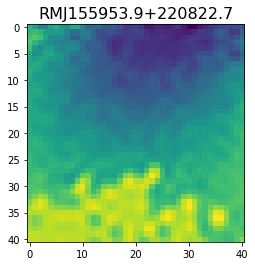

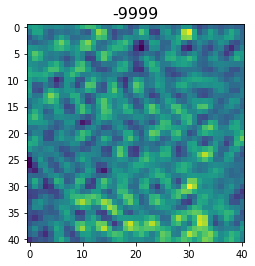

  4%|▎         | 103/2761 [00:08<04:24, 10.03it/s]

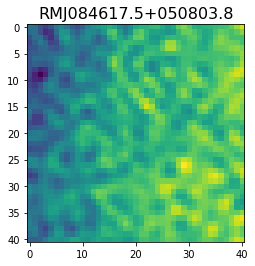

  4%|▍         | 105/2761 [00:08<04:00, 11.02it/s]

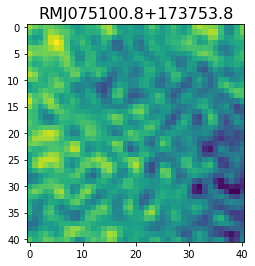

  4%|▍         | 107/2761 [00:08<04:12, 10.52it/s]

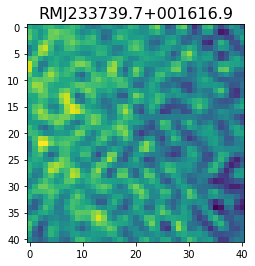

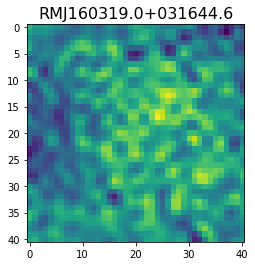

  4%|▍         | 109/2761 [00:08<04:26,  9.95it/s]

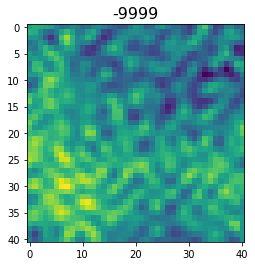

  4%|▍         | 114/2761 [00:09<02:58, 14.84it/s]

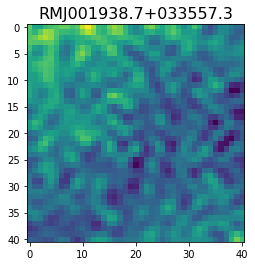

  4%|▍         | 116/2761 [00:09<02:56, 14.95it/s]

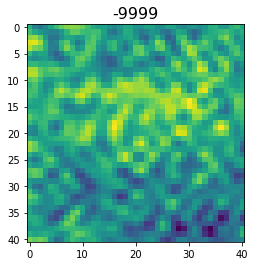

  4%|▍         | 118/2761 [00:09<02:54, 15.10it/s]

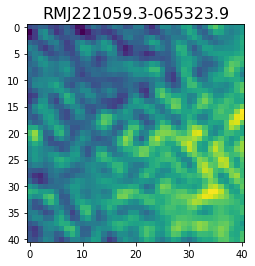

  4%|▍         | 121/2761 [00:09<02:38, 16.66it/s]

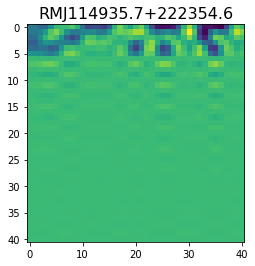

  4%|▍         | 124/2761 [00:09<02:28, 17.81it/s]

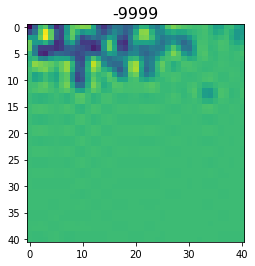

  5%|▍         | 126/2761 [00:09<02:34, 17.07it/s]

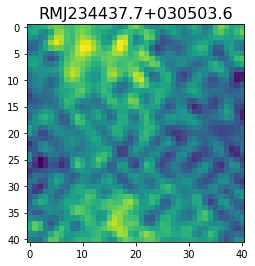

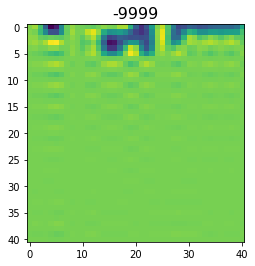

  5%|▍         | 128/2761 [00:10<03:13, 13.62it/s]

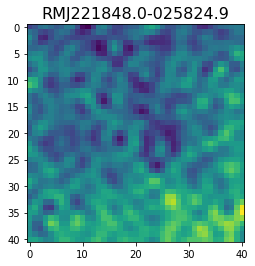

  5%|▍         | 130/2761 [00:10<03:09, 13.92it/s]

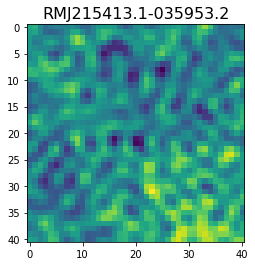

  5%|▍         | 132/2761 [00:10<03:05, 14.20it/s]

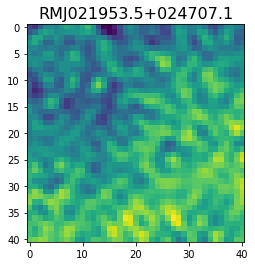

  5%|▍         | 134/2761 [00:10<03:33, 12.32it/s]

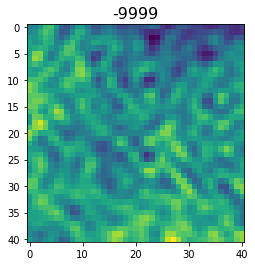

  5%|▍         | 136/2761 [00:10<03:21, 13.03it/s]

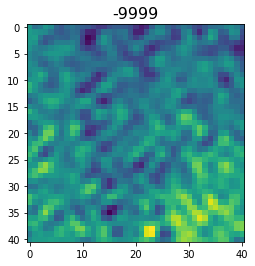

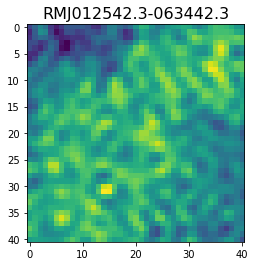

  5%|▍         | 138/2761 [00:10<03:52, 11.30it/s]

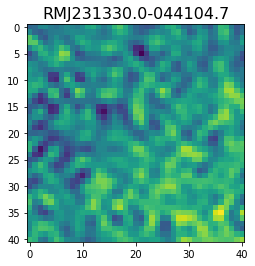

  5%|▌         | 140/2761 [00:11<03:35, 12.18it/s]

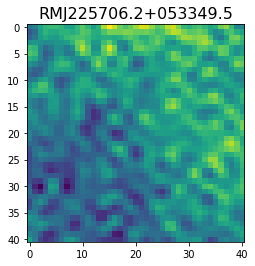

  5%|▌         | 142/2761 [00:11<03:23, 12.88it/s]

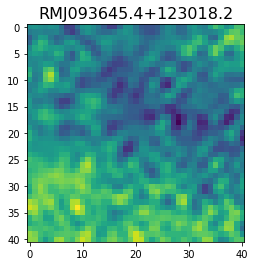

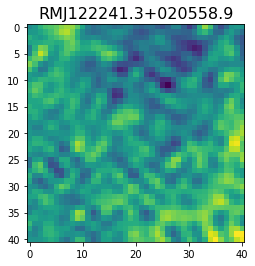

  5%|▌         | 144/2761 [00:11<03:51, 11.28it/s]

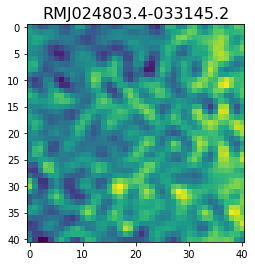

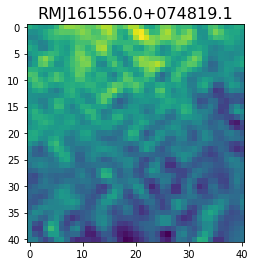

  5%|▌         | 146/2761 [00:11<04:11, 10.39it/s]

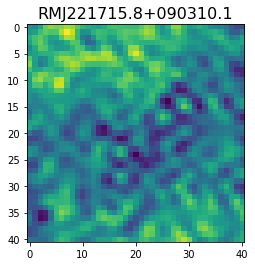

  5%|▌         | 148/2761 [00:11<03:48, 11.45it/s]

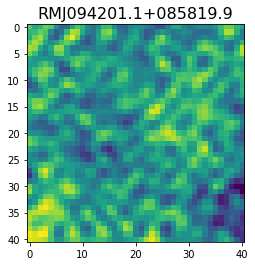

  5%|▌         | 150/2761 [00:11<03:30, 12.38it/s]

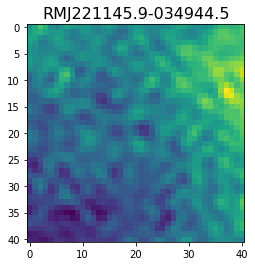

  6%|▌         | 153/2761 [00:12<02:58, 14.65it/s]

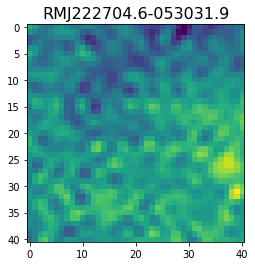

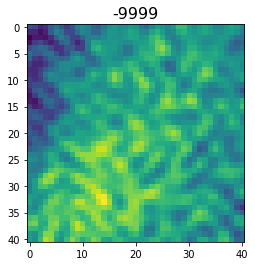

  6%|▌         | 155/2761 [00:12<04:00, 10.85it/s]

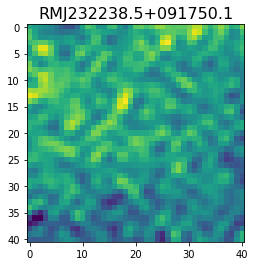

  6%|▌         | 157/2761 [00:12<03:41, 11.78it/s]

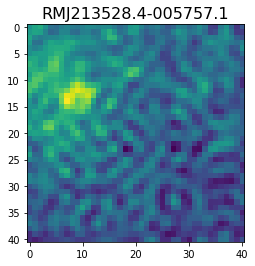

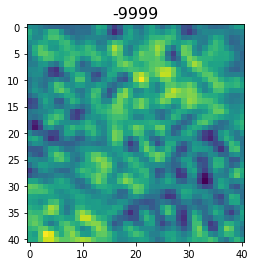

  6%|▌         | 159/2761 [00:12<04:01, 10.79it/s]

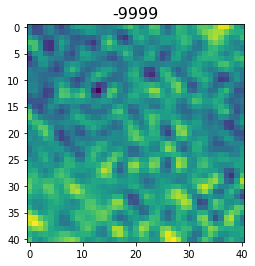

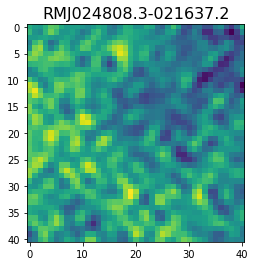

  6%|▌         | 161/2761 [00:12<04:15, 10.17it/s]

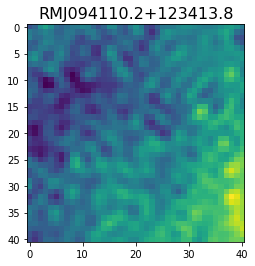

  6%|▌         | 165/2761 [00:13<03:06, 13.95it/s]

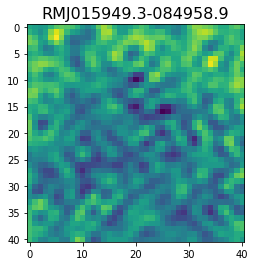

  6%|▌         | 167/2761 [00:13<03:01, 14.31it/s]

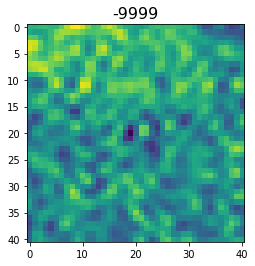

  6%|▌         | 169/2761 [00:13<02:57, 14.56it/s]

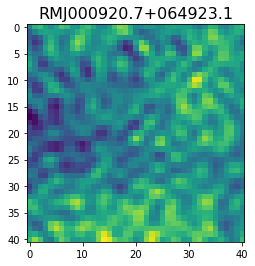

  6%|▌         | 172/2761 [00:13<02:39, 16.26it/s]

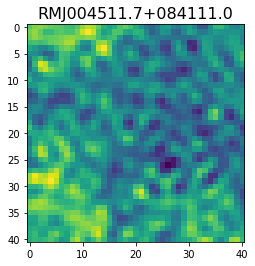

  6%|▋         | 174/2761 [00:13<02:40, 16.09it/s]

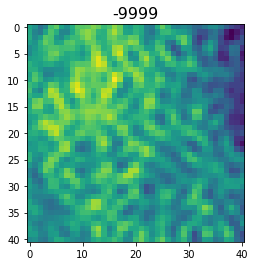

  6%|▋         | 176/2761 [00:13<02:41, 15.97it/s]

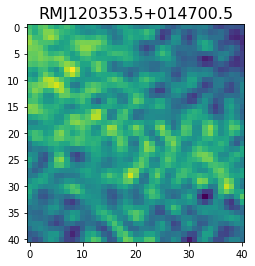

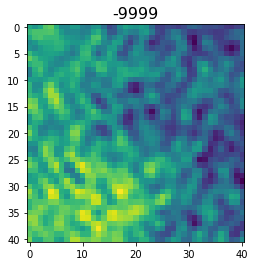

  6%|▋         | 178/2761 [00:14<03:46, 11.39it/s]

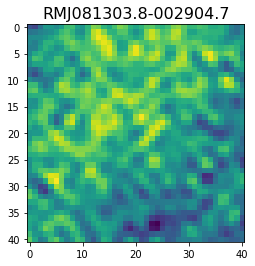

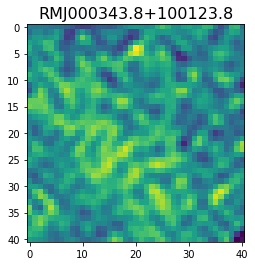

  7%|▋         | 180/2761 [00:14<04:06, 10.46it/s]

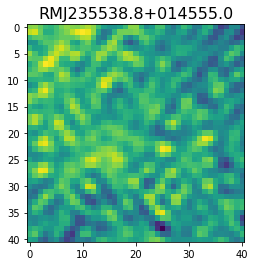

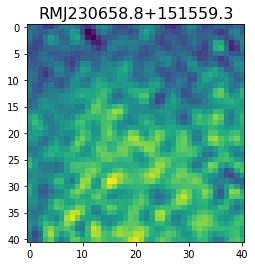

  7%|▋         | 182/2761 [00:14<04:21,  9.88it/s]

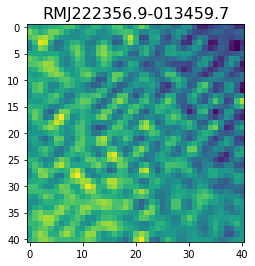

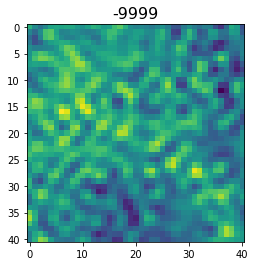

  7%|▋         | 184/2761 [00:14<04:28,  9.58it/s]

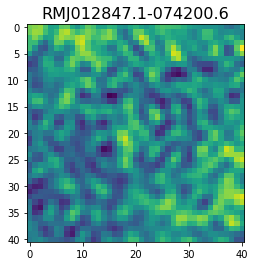

  7%|▋         | 186/2761 [00:14<03:58, 10.79it/s]

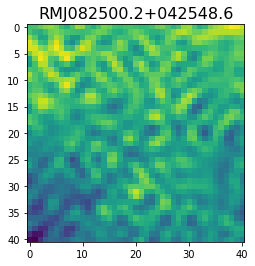

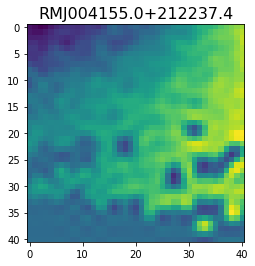

  7%|▋         | 188/2761 [00:15<04:13, 10.17it/s]

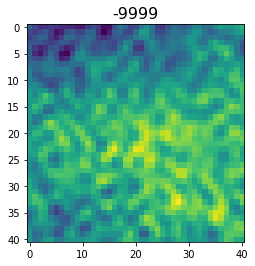

  7%|▋         | 191/2761 [00:15<03:22, 12.70it/s]

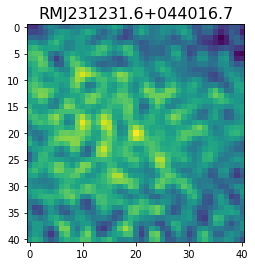

  7%|▋         | 193/2761 [00:15<03:12, 13.32it/s]

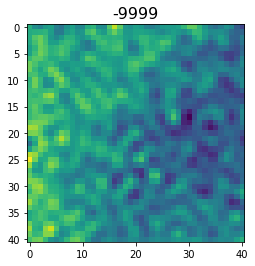

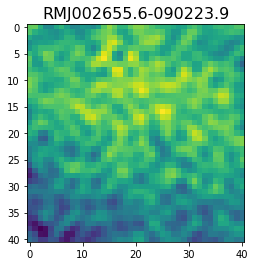

  7%|▋         | 195/2761 [00:15<04:07, 10.36it/s]

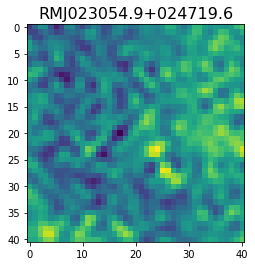

  7%|▋         | 197/2761 [00:15<03:45, 11.39it/s]

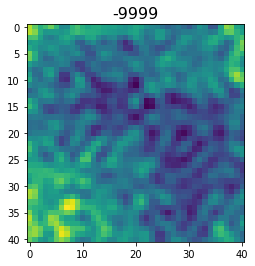

  7%|▋         | 199/2761 [00:15<03:26, 12.42it/s]

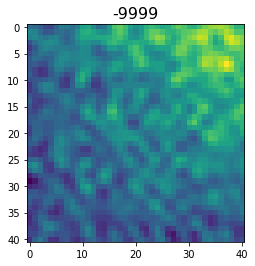

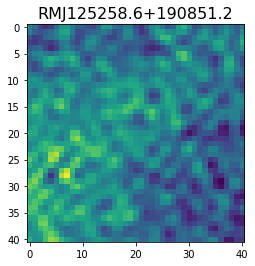

  7%|▋         | 201/2761 [00:16<03:49, 11.16it/s]

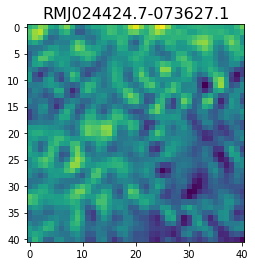

  7%|▋         | 203/2761 [00:16<03:29, 12.20it/s]

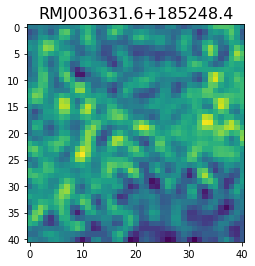

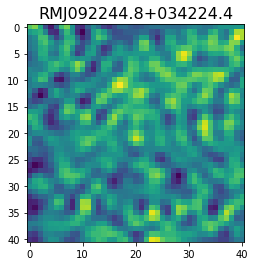

  7%|▋         | 205/2761 [00:16<03:50, 11.08it/s]

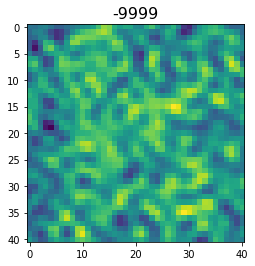

  7%|▋         | 207/2761 [00:16<03:30, 12.12it/s]

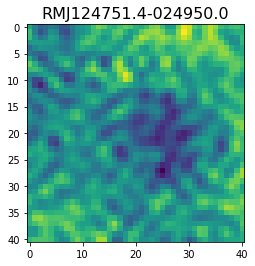

  8%|▊         | 209/2761 [00:16<03:15, 13.02it/s]

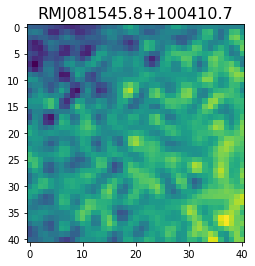

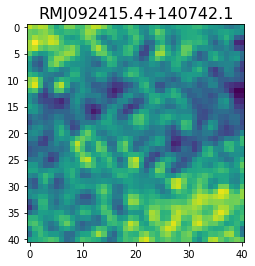

  8%|▊         | 211/2761 [00:16<03:43, 11.42it/s]

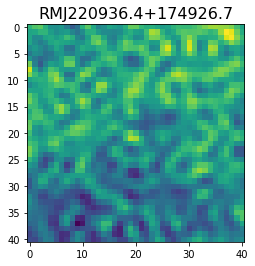

  8%|▊         | 213/2761 [00:17<03:57, 10.74it/s]

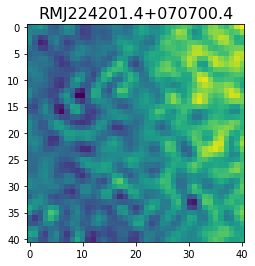

  8%|▊         | 215/2761 [00:17<03:36, 11.74it/s]

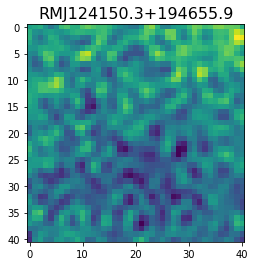

  8%|▊         | 217/2761 [00:17<03:21, 12.63it/s]

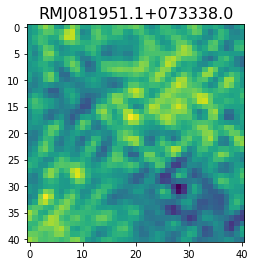

  8%|▊         | 219/2761 [00:17<03:10, 13.38it/s]

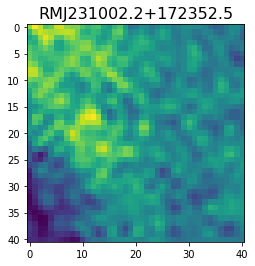

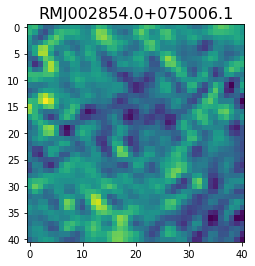

  8%|▊         | 221/2761 [00:17<03:38, 11.65it/s]

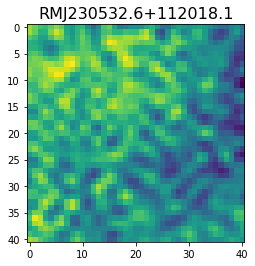

  8%|▊         | 223/2761 [00:17<03:21, 12.58it/s]

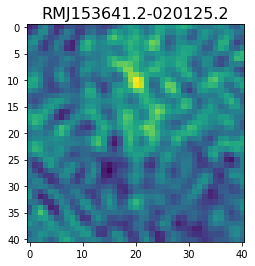

  8%|▊         | 225/2761 [00:18<03:09, 13.38it/s]

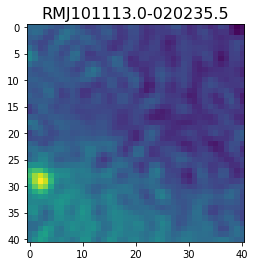

  8%|▊         | 228/2761 [00:18<02:42, 15.59it/s]

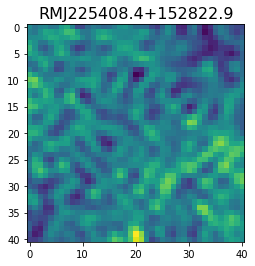

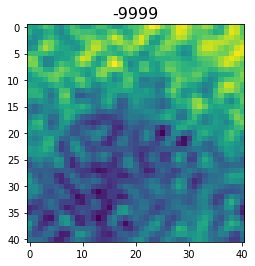

  8%|▊         | 230/2761 [00:18<03:14, 12.99it/s]

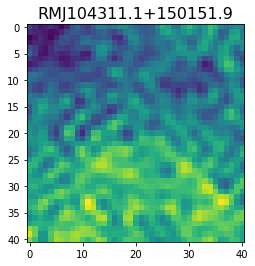

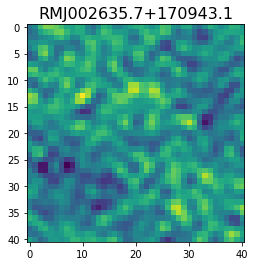

  8%|▊         | 232/2761 [00:18<03:40, 11.48it/s]

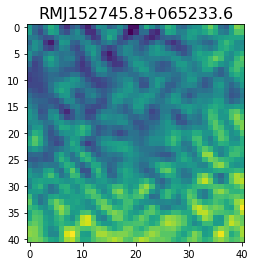

  8%|▊         | 234/2761 [00:18<03:54, 10.78it/s]

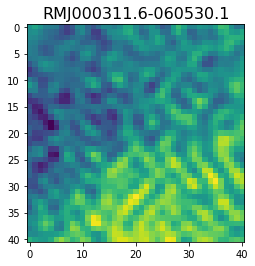

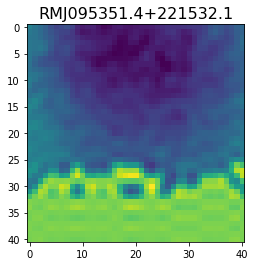

  9%|▊         | 236/2761 [00:19<04:10, 10.07it/s]

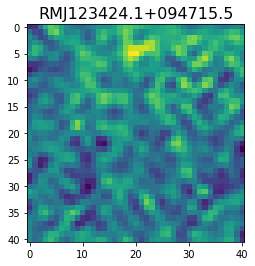

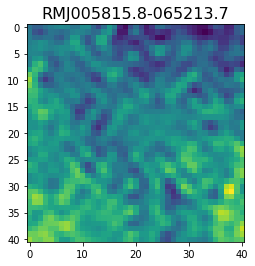

  9%|▊         | 238/2761 [00:19<04:19,  9.74it/s]

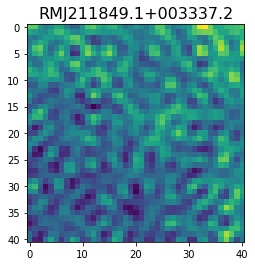

  9%|▊         | 240/2761 [00:19<03:50, 10.92it/s]

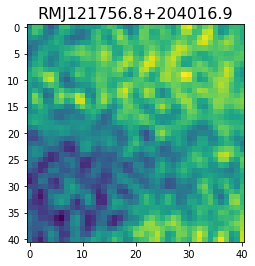

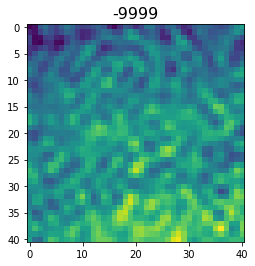

  9%|▉         | 242/2761 [00:19<04:05, 10.27it/s]

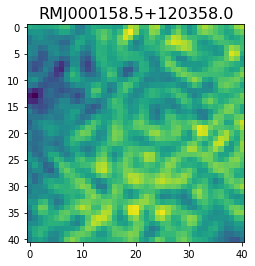

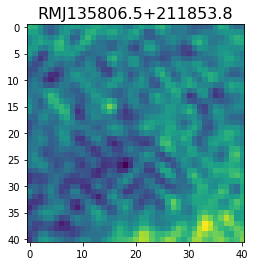

  9%|▉         | 244/2761 [00:19<04:17,  9.79it/s]

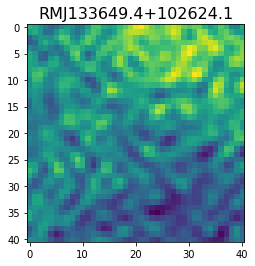

  9%|▉         | 246/2761 [00:20<03:50, 10.89it/s]

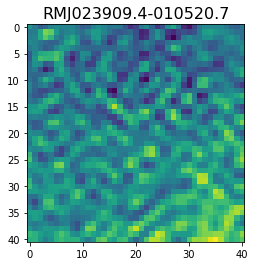

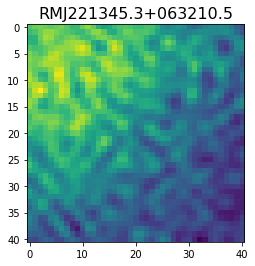

  9%|▉         | 248/2761 [00:20<04:07, 10.17it/s]

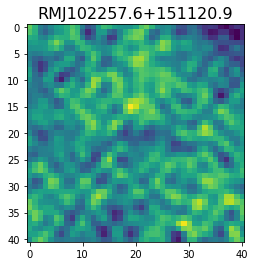

  9%|▉         | 252/2761 [00:20<03:24, 12.30it/s]

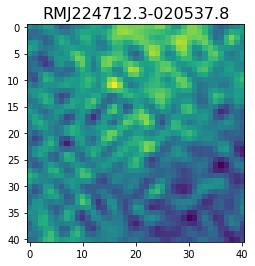

  9%|▉         | 254/2761 [00:20<03:15, 12.80it/s]

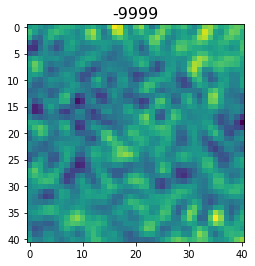

  9%|▉         | 256/2761 [00:20<03:07, 13.35it/s]

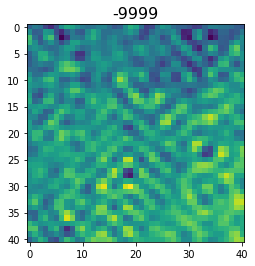

  9%|▉         | 261/2761 [00:20<02:21, 17.70it/s]

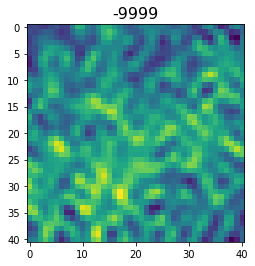

 10%|▉         | 263/2761 [00:21<02:26, 17.08it/s]

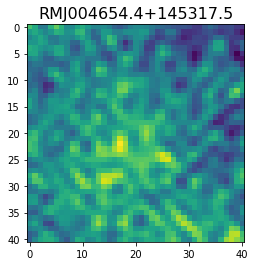

 10%|▉         | 265/2761 [00:21<02:31, 16.49it/s]

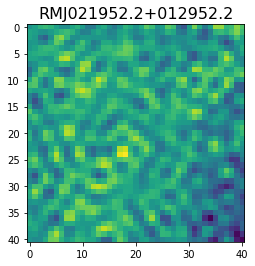

 10%|▉         | 267/2761 [00:21<02:38, 15.76it/s]

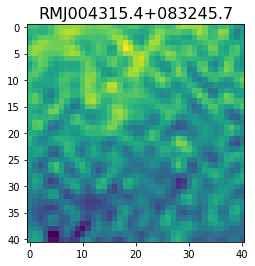

 10%|▉         | 270/2761 [00:21<02:24, 17.19it/s]

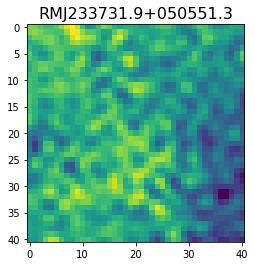

 10%|▉         | 272/2761 [00:21<02:28, 16.72it/s]

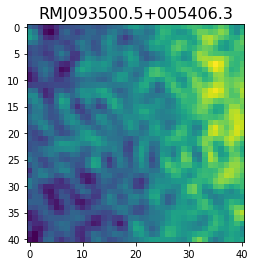

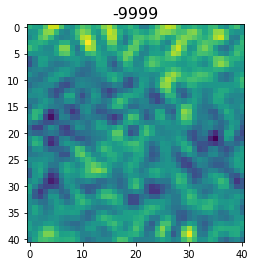

 10%|▉         | 274/2761 [00:21<03:03, 13.53it/s]

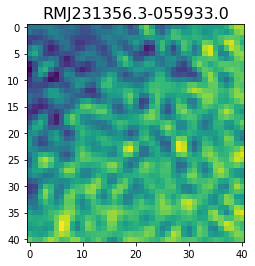

 10%|█         | 277/2761 [00:21<02:40, 15.47it/s]

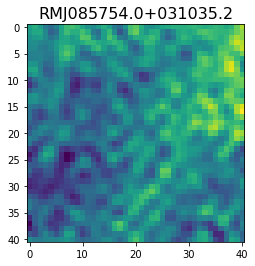

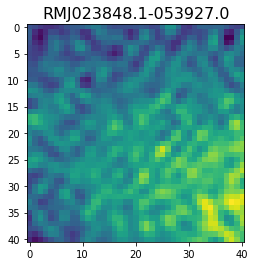

 10%|█         | 279/2761 [00:22<03:37, 11.42it/s]

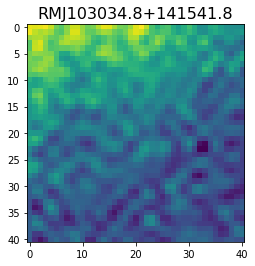

 10%|█         | 281/2761 [00:22<03:22, 12.25it/s]

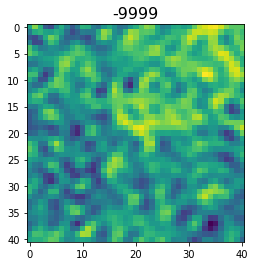

 10%|█         | 283/2761 [00:22<03:10, 13.00it/s]

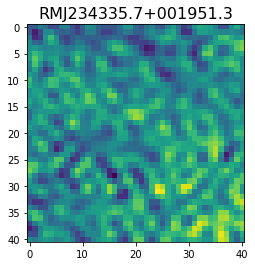

 10%|█         | 285/2761 [00:22<03:01, 13.63it/s]

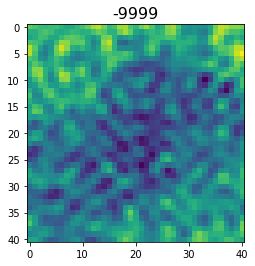

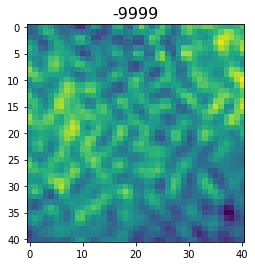

 10%|█         | 287/2761 [00:22<03:29, 11.79it/s]

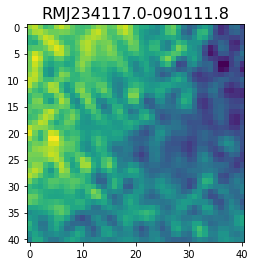

 10%|█         | 289/2761 [00:23<03:15, 12.62it/s]

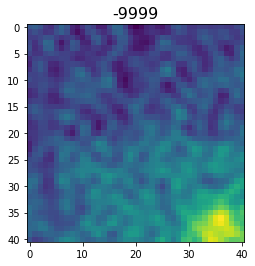

 11%|█         | 291/2761 [00:23<03:06, 13.26it/s]

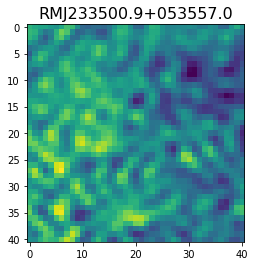

 11%|█         | 293/2761 [00:23<02:57, 13.88it/s]

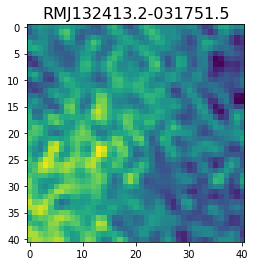

 11%|█         | 296/2761 [00:23<02:34, 15.93it/s]

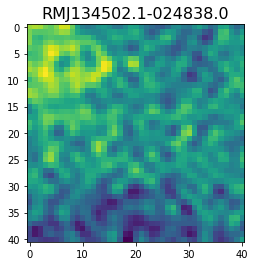

 11%|█         | 298/2761 [00:23<02:36, 15.70it/s]

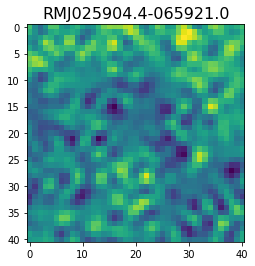

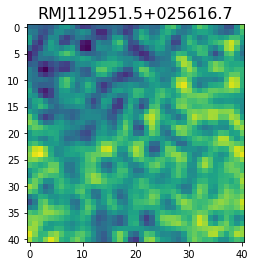

 11%|█         | 300/2761 [00:23<03:09, 13.00it/s]

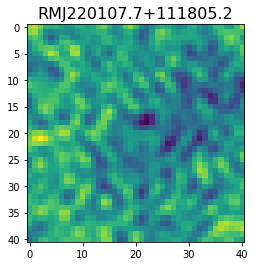

 11%|█         | 302/2761 [00:24<03:29, 11.74it/s]

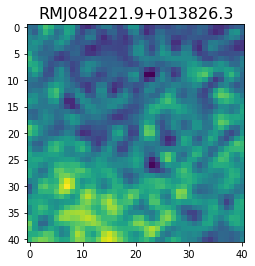

 11%|█         | 304/2761 [00:24<03:16, 12.53it/s]

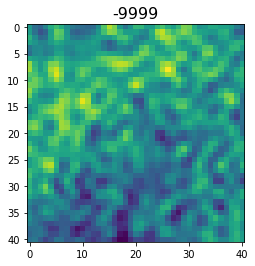

 11%|█         | 306/2761 [00:24<03:04, 13.31it/s]

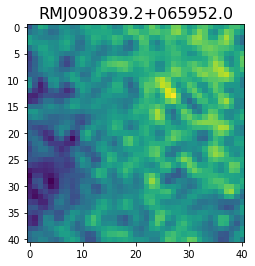

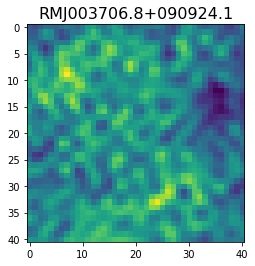

 11%|█         | 308/2761 [00:24<03:31, 11.61it/s]

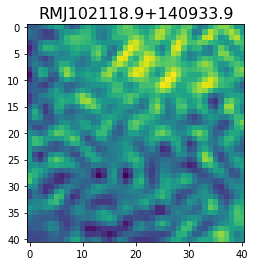

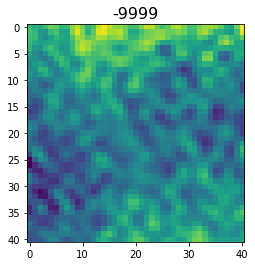

 11%|█         | 310/2761 [00:24<03:51, 10.59it/s]

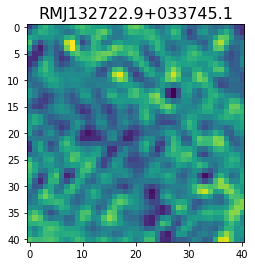

 11%|█▏        | 312/2761 [00:24<03:31, 11.56it/s]

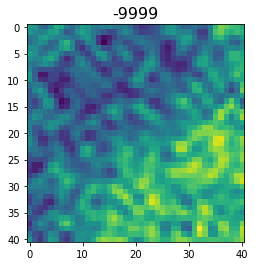

 11%|█▏        | 314/2761 [00:25<03:17, 12.38it/s]

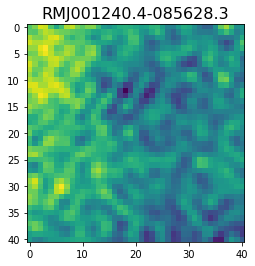

 11%|█▏        | 316/2761 [00:25<03:06, 13.10it/s]

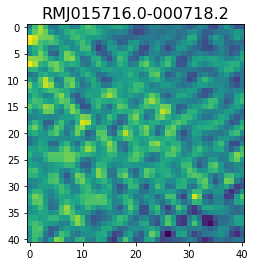

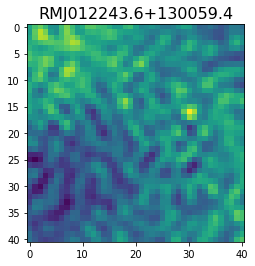

 12%|█▏        | 318/2761 [00:25<03:33, 11.43it/s]

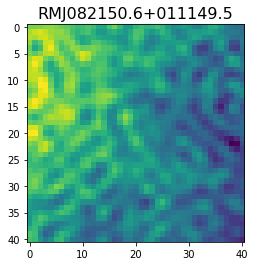

 12%|█▏        | 320/2761 [00:25<03:18, 12.28it/s]

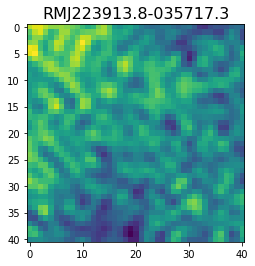

 12%|█▏        | 322/2761 [00:25<03:39, 11.13it/s]

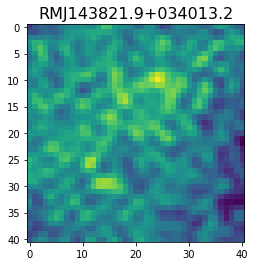

 12%|█▏        | 324/2761 [00:25<03:22, 12.06it/s]

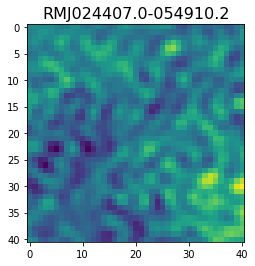

 12%|█▏        | 326/2761 [00:25<03:11, 12.74it/s]

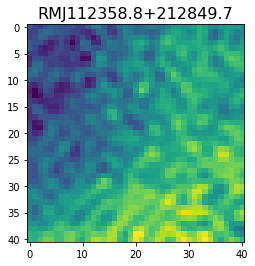

 12%|█▏        | 328/2761 [00:26<03:02, 13.32it/s]

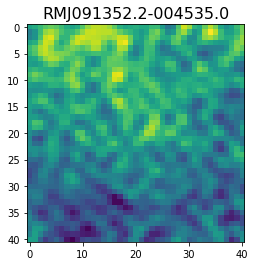

 12%|█▏        | 330/2761 [00:26<02:56, 13.73it/s]

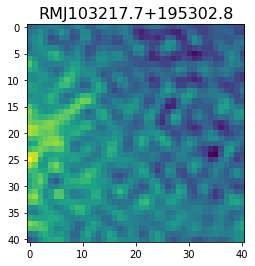

 12%|█▏        | 332/2761 [00:26<02:51, 14.15it/s]

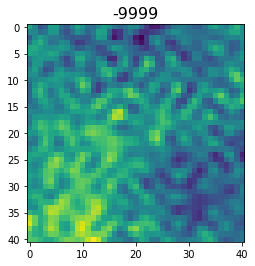

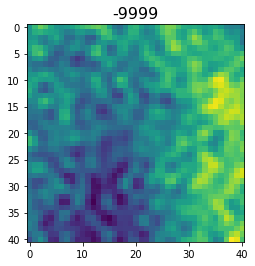

 12%|█▏        | 334/2761 [00:26<03:24, 11.88it/s]

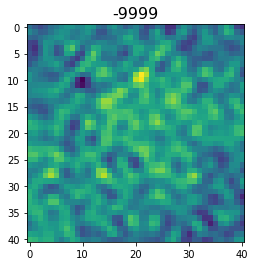

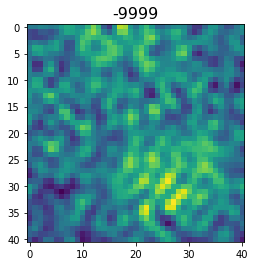

 12%|█▏        | 336/2761 [00:26<03:46, 10.70it/s]

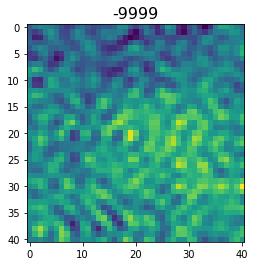

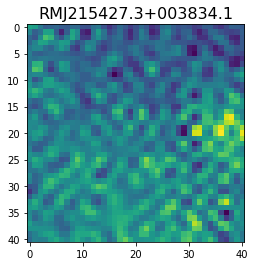

 12%|█▏        | 338/2761 [00:27<04:01, 10.04it/s]

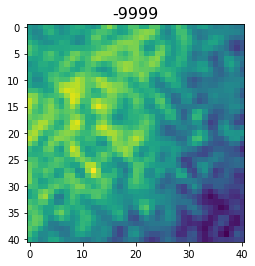

 12%|█▏        | 340/2761 [00:27<03:35, 11.25it/s]

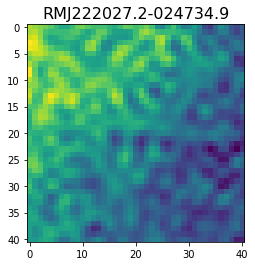

 12%|█▏        | 342/2761 [00:27<03:48, 10.60it/s]

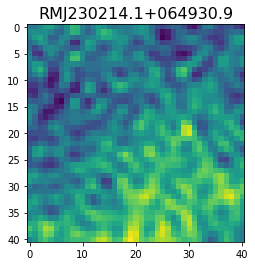

 12%|█▏        | 344/2761 [00:27<03:28, 11.60it/s]

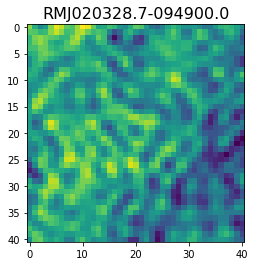

 13%|█▎        | 346/2761 [00:27<03:13, 12.46it/s]

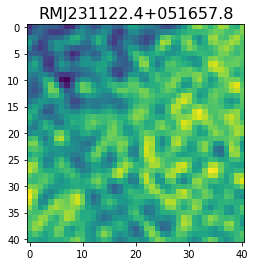

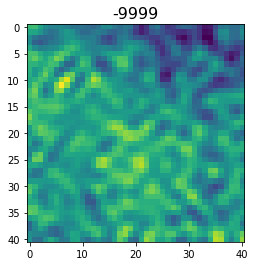

 13%|█▎        | 348/2761 [00:27<03:36, 11.17it/s]

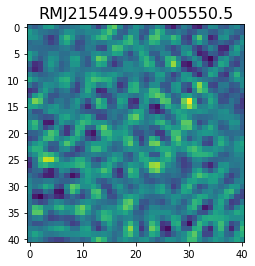

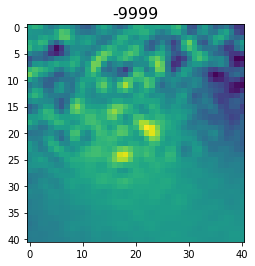

 13%|█▎        | 350/2761 [00:28<03:53, 10.30it/s]

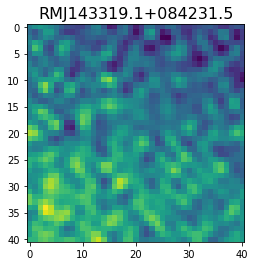

 13%|█▎        | 354/2761 [00:28<02:51, 14.06it/s]

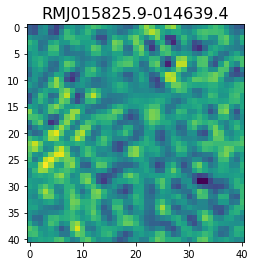

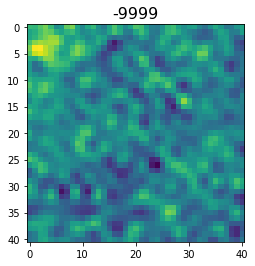

 13%|█▎        | 356/2761 [00:28<03:15, 12.31it/s]

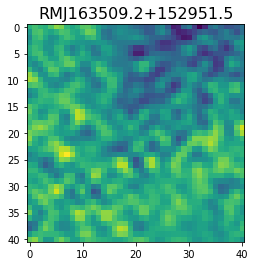

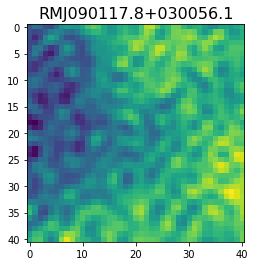

 13%|█▎        | 358/2761 [00:28<03:35, 11.14it/s]

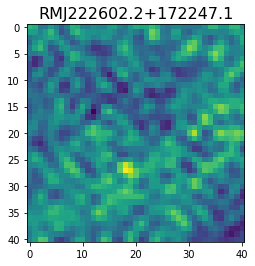

 13%|█▎        | 360/2761 [00:28<03:20, 11.99it/s]

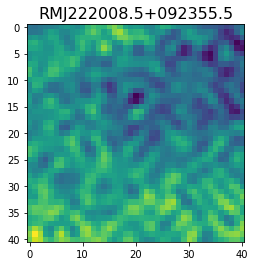

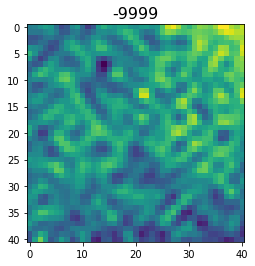

 13%|█▎        | 362/2761 [00:29<04:07,  9.70it/s]

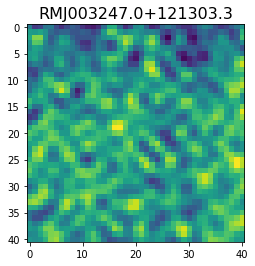

 13%|█▎        | 364/2761 [00:29<03:41, 10.80it/s]

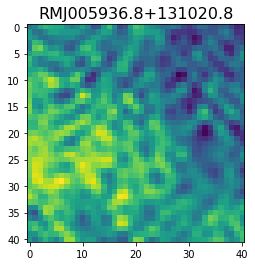

 13%|█▎        | 366/2761 [00:29<03:22, 11.82it/s]

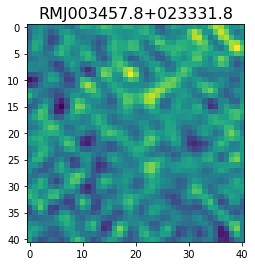

 13%|█▎        | 368/2761 [00:29<03:09, 12.60it/s]

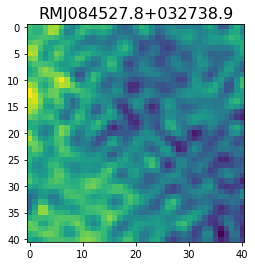

 13%|█▎        | 372/2761 [00:29<02:27, 16.21it/s]

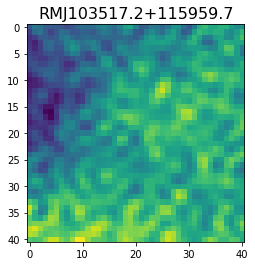

 14%|█▎        | 376/2761 [00:29<02:06, 18.79it/s]

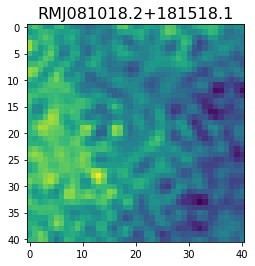

 14%|█▎        | 378/2761 [00:30<02:25, 16.38it/s]

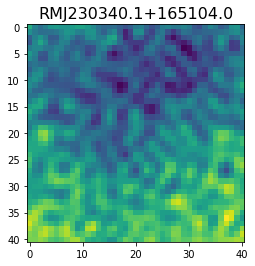

 14%|█▍        | 380/2761 [00:30<02:34, 15.42it/s]

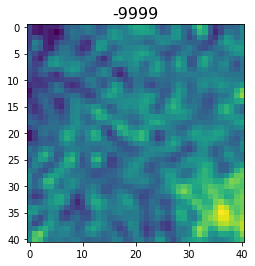

 14%|█▍        | 382/2761 [00:30<02:36, 15.22it/s]

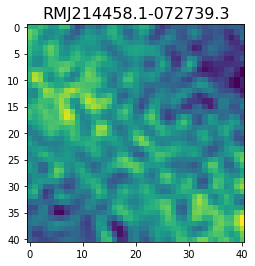

 14%|█▍        | 384/2761 [00:30<02:38, 15.01it/s]

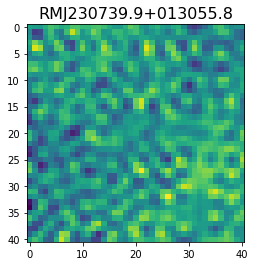

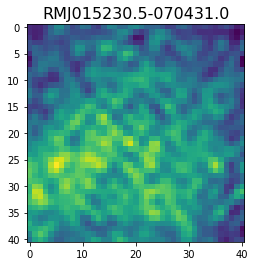

 14%|█▍        | 386/2761 [00:30<03:09, 12.55it/s]

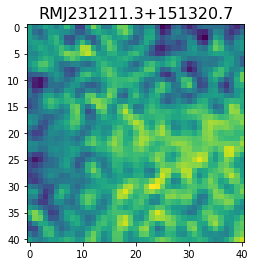

 14%|█▍        | 388/2761 [00:30<03:34, 11.07it/s]

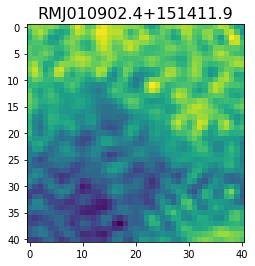

 14%|█▍        | 390/2761 [00:31<03:27, 11.41it/s]

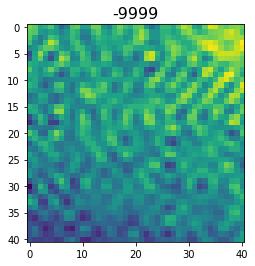

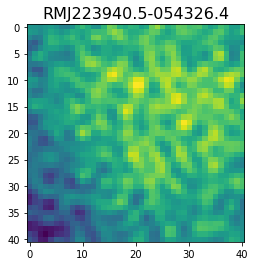

 14%|█▍        | 392/2761 [00:31<03:51, 10.22it/s]

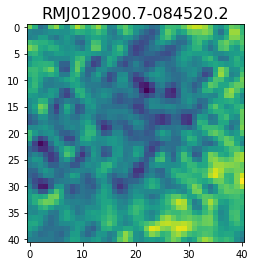

 14%|█▍        | 394/2761 [00:31<03:32, 11.14it/s]

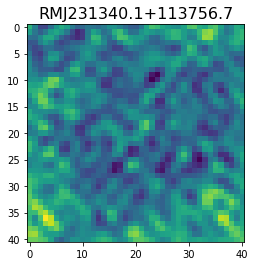

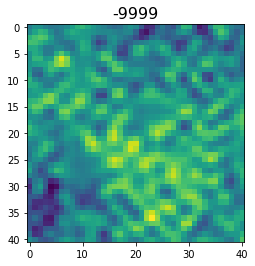

 14%|█▍        | 396/2761 [00:31<03:50, 10.25it/s]

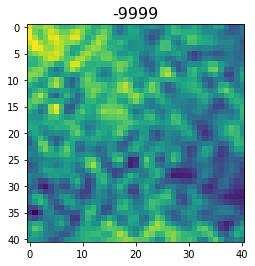

 14%|█▍        | 398/2761 [00:31<03:27, 11.40it/s]

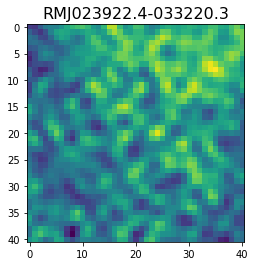

 15%|█▍        | 401/2761 [00:32<02:51, 13.75it/s]

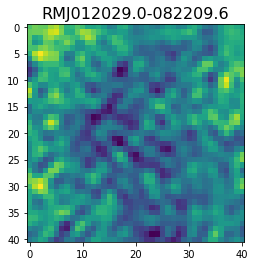

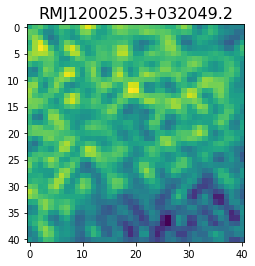

 15%|█▍        | 403/2761 [00:32<03:19, 11.79it/s]

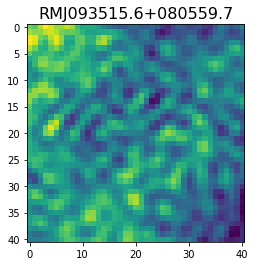

 15%|█▍        | 405/2761 [00:32<03:16, 12.02it/s]

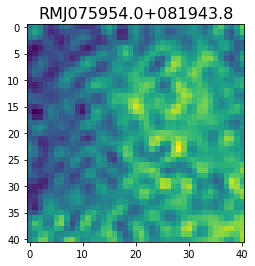

 15%|█▍        | 407/2761 [00:32<03:13, 12.19it/s]

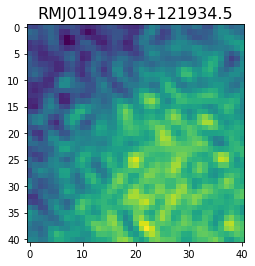

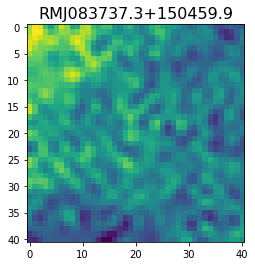

 15%|█▍        | 409/2761 [00:32<04:05,  9.60it/s]

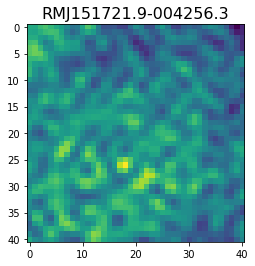

 15%|█▍        | 412/2761 [00:33<03:21, 11.66it/s]

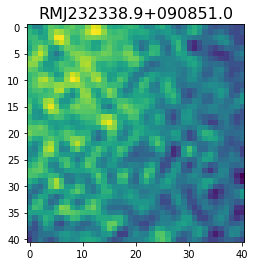

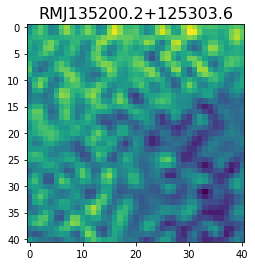

 15%|█▍        | 414/2761 [00:33<03:51, 10.13it/s]

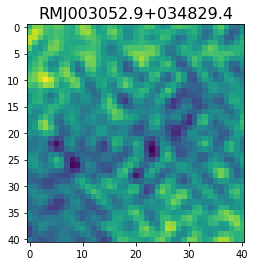

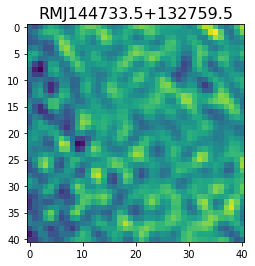

 15%|█▌        | 416/2761 [00:33<04:07,  9.46it/s]

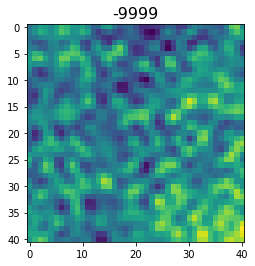

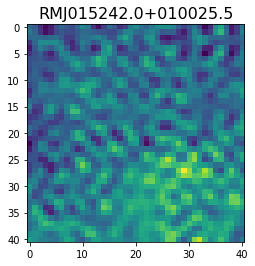

 15%|█▌        | 418/2761 [00:33<04:19,  9.02it/s]

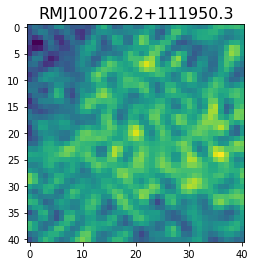

 15%|█▌        | 419/2761 [00:33<04:22,  8.91it/s]

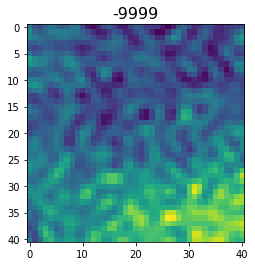

 15%|█▌        | 420/2761 [00:34<04:25,  8.80it/s]

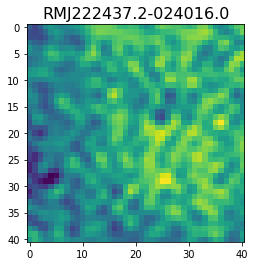

 15%|█▌        | 423/2761 [00:34<03:19, 11.69it/s]

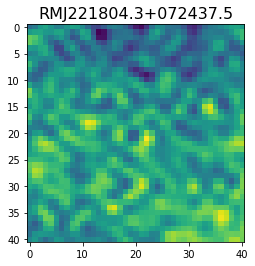

 15%|█▌        | 425/2761 [00:34<03:08, 12.41it/s]

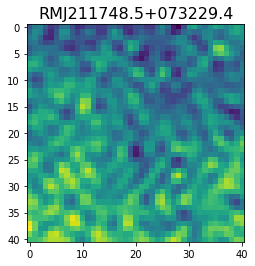

 15%|█▌        | 427/2761 [00:34<03:24, 11.42it/s]

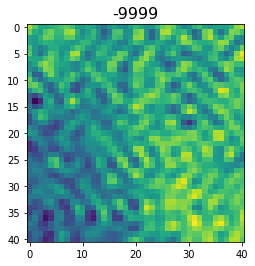

 16%|█▌        | 432/2761 [00:34<02:22, 16.32it/s]

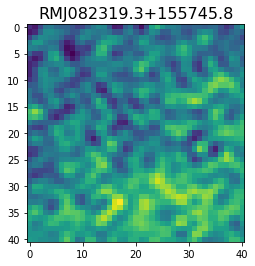

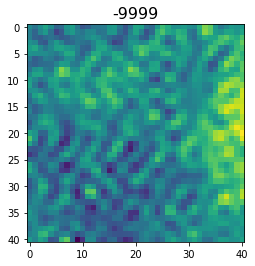

 16%|█▌        | 434/2761 [00:35<02:54, 13.33it/s]

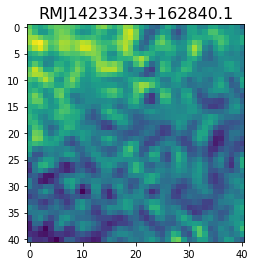

 16%|█▌        | 437/2761 [00:35<02:36, 14.80it/s]

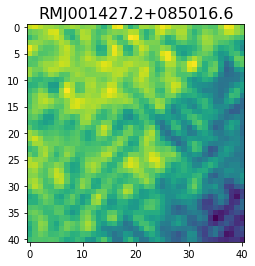

 16%|█▌        | 439/2761 [00:35<02:48, 13.74it/s]

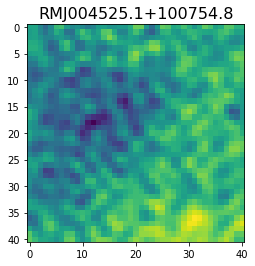

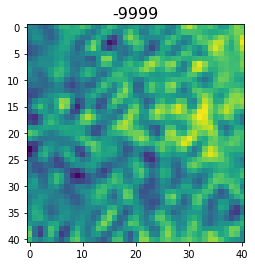

 16%|█▌        | 441/2761 [00:35<03:39, 10.59it/s]

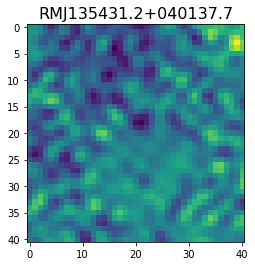

 16%|█▌        | 443/2761 [00:35<03:32, 10.88it/s]

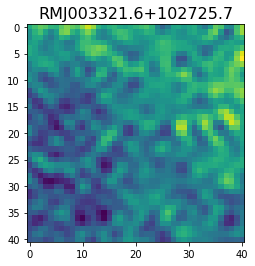

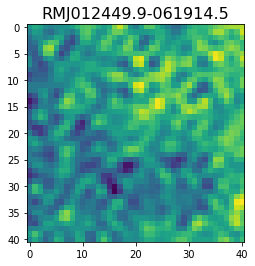

 16%|█▌        | 445/2761 [00:36<04:15,  9.07it/s]

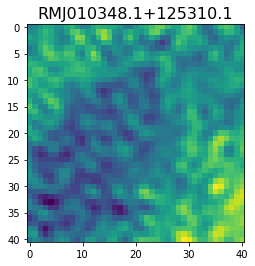

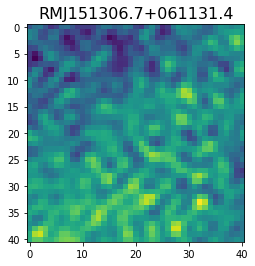

 16%|█▌        | 447/2761 [00:36<04:22,  8.81it/s]

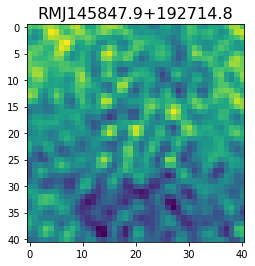

 16%|█▌        | 448/2761 [00:36<04:49,  7.99it/s]

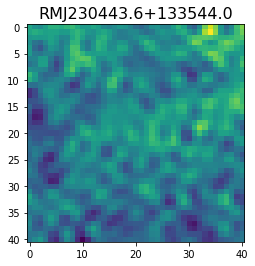

 16%|█▋        | 449/2761 [00:36<04:43,  8.17it/s]

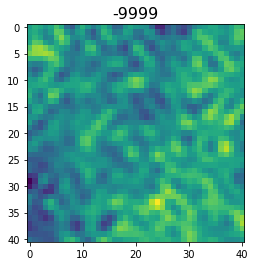

 16%|█▋        | 450/2761 [00:36<04:37,  8.33it/s]

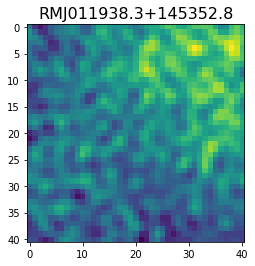

 16%|█▋        | 451/2761 [00:36<04:32,  8.47it/s]

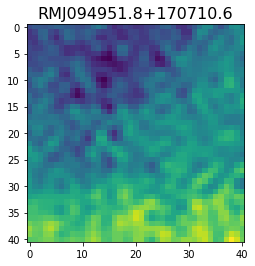

 16%|█▋        | 453/2761 [00:37<03:41, 10.41it/s]

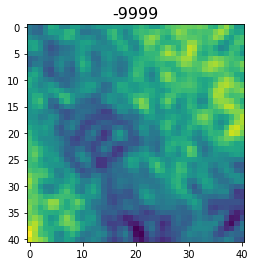

 16%|█▋        | 455/2761 [00:37<03:25, 11.23it/s]

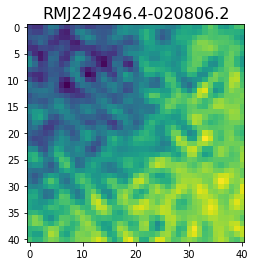

 17%|█▋        | 457/2761 [00:37<03:09, 12.13it/s]

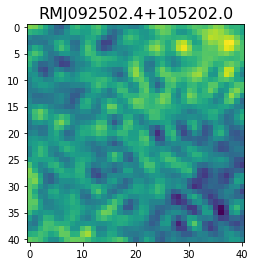

 17%|█▋        | 459/2761 [00:37<03:00, 12.78it/s]

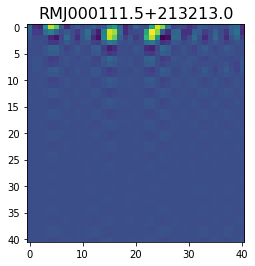

 17%|█▋        | 461/2761 [00:37<02:53, 13.26it/s]

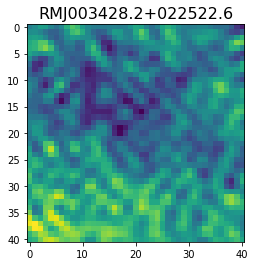

 17%|█▋        | 465/2761 [00:37<02:17, 16.71it/s]

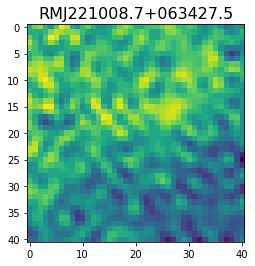

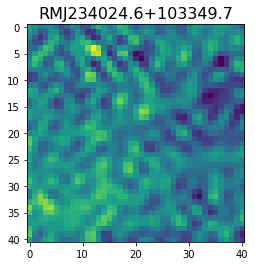

 17%|█▋        | 467/2761 [00:38<02:52, 13.27it/s]

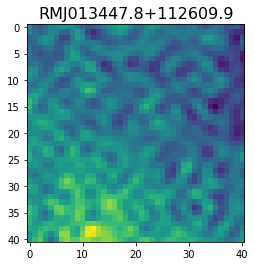

 17%|█▋        | 469/2761 [00:38<02:49, 13.52it/s]

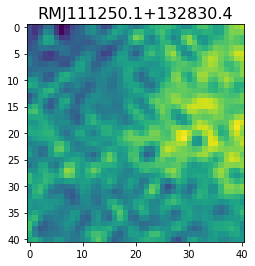

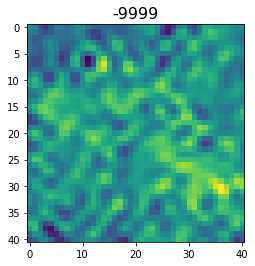

 17%|█▋        | 471/2761 [00:38<03:38, 10.49it/s]

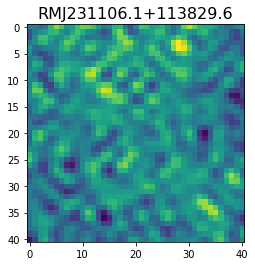

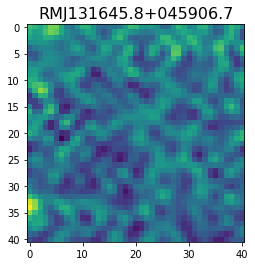

 17%|█▋        | 473/2761 [00:38<03:54,  9.77it/s]

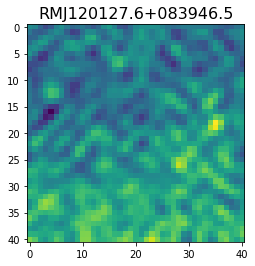

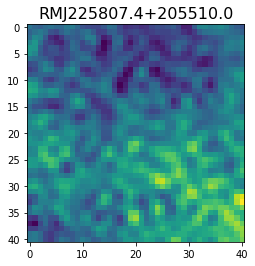

 17%|█▋        | 475/2761 [00:38<04:07,  9.24it/s]

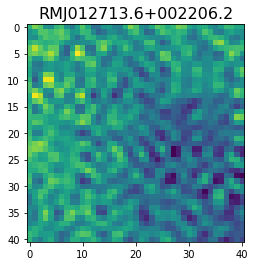

 17%|█▋        | 476/2761 [00:39<04:13,  9.01it/s]

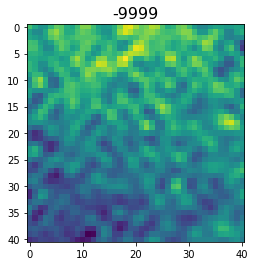

 17%|█▋        | 477/2761 [00:39<04:18,  8.84it/s]

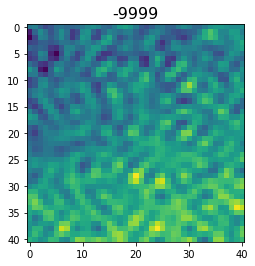

 17%|█▋        | 478/2761 [00:39<04:26,  8.57it/s]

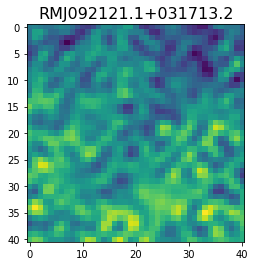

 17%|█▋        | 481/2761 [00:39<03:18, 11.50it/s]

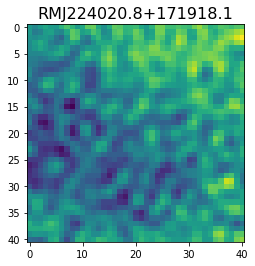

 17%|█▋        | 483/2761 [00:39<03:08, 12.08it/s]

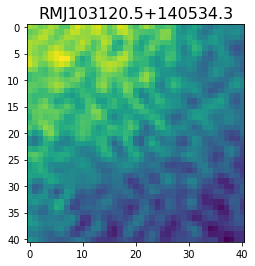

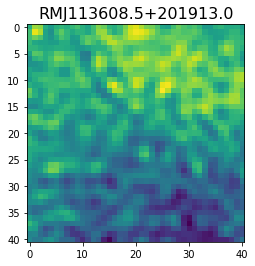

 18%|█▊        | 485/2761 [00:39<03:39, 10.35it/s]

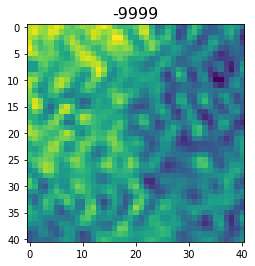

 18%|█▊        | 487/2761 [00:40<03:43, 10.15it/s]

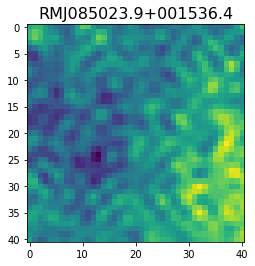

 18%|█▊        | 489/2761 [00:40<03:23, 11.14it/s]

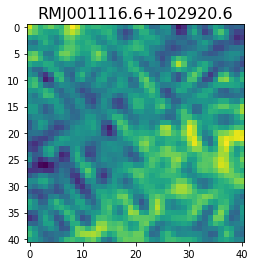

 18%|█▊        | 491/2761 [00:40<03:11, 11.85it/s]

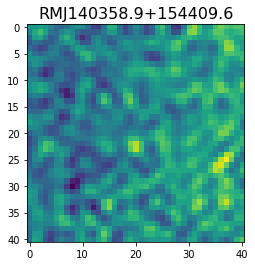

 18%|█▊        | 493/2761 [00:40<03:02, 12.46it/s]

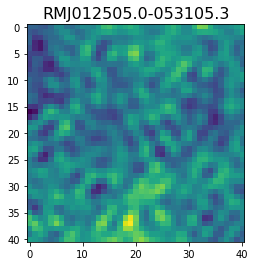

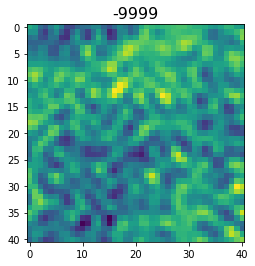

 18%|█▊        | 495/2761 [00:40<03:30, 10.75it/s]

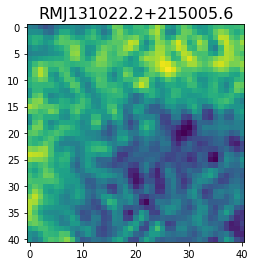

 18%|█▊        | 499/2761 [00:40<02:37, 14.34it/s]

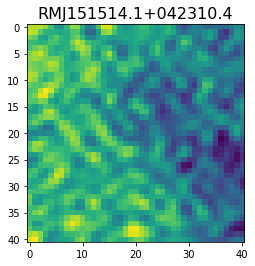

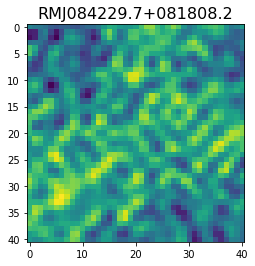

 18%|█▊        | 501/2761 [00:41<03:09, 11.95it/s]

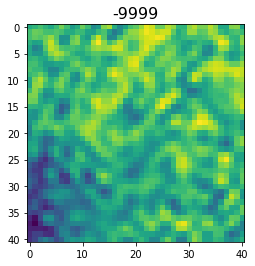

 18%|█▊        | 503/2761 [00:41<03:09, 11.93it/s]

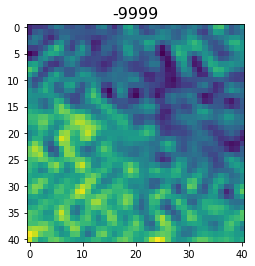

 18%|█▊        | 505/2761 [00:41<03:01, 12.41it/s]

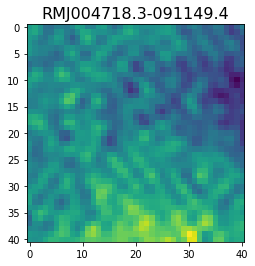

 18%|█▊        | 507/2761 [00:41<02:56, 12.80it/s]

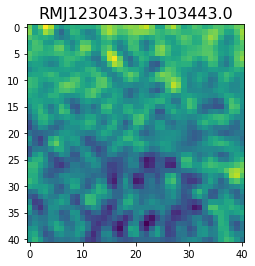

 18%|█▊        | 509/2761 [00:41<02:50, 13.17it/s]

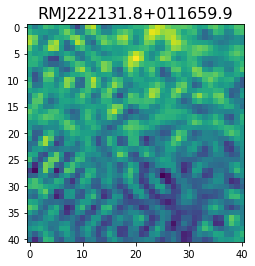

 19%|█▊        | 511/2761 [00:41<03:08, 11.92it/s]

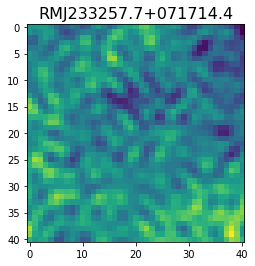

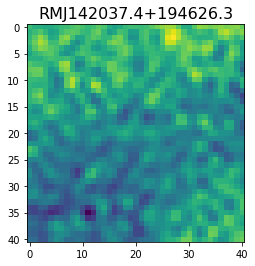

 19%|█▊        | 513/2761 [00:42<03:31, 10.64it/s]

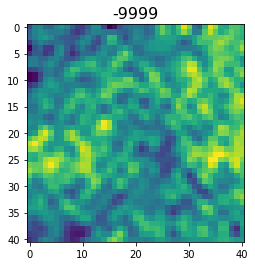

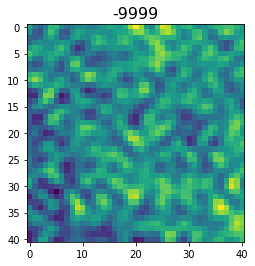

 19%|█▊        | 515/2761 [00:42<03:47,  9.85it/s]

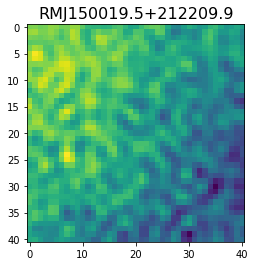

 19%|█▉        | 518/2761 [00:42<03:02, 12.30it/s]

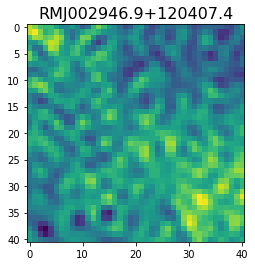

 19%|█▉        | 520/2761 [00:42<02:55, 12.75it/s]

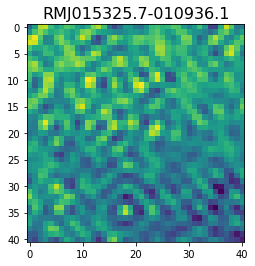

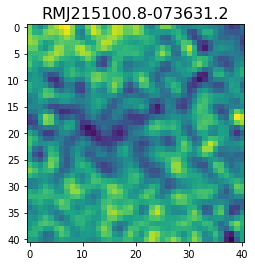

 19%|█▉        | 522/2761 [00:42<03:21, 11.10it/s]

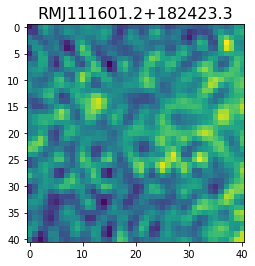

 19%|█▉        | 524/2761 [00:43<03:06, 11.99it/s]

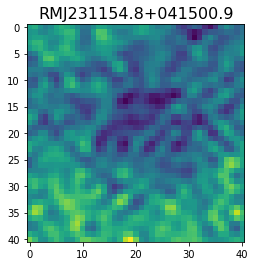

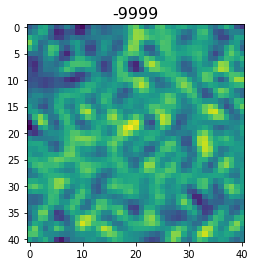

 19%|█▉        | 526/2761 [00:43<03:23, 10.96it/s]

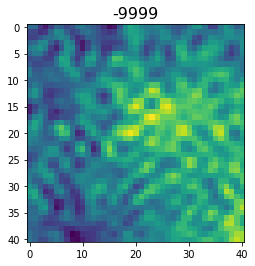

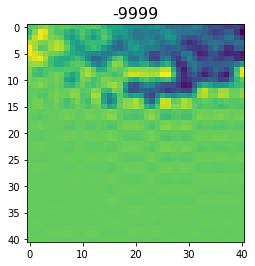

 19%|█▉        | 535/2761 [00:43<01:58, 18.76it/s]

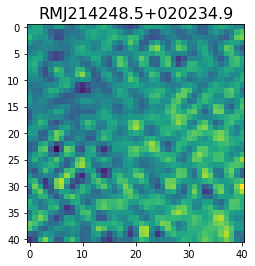

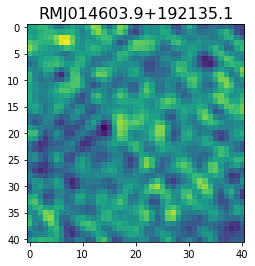

 19%|█▉        | 538/2761 [00:43<02:14, 16.51it/s]

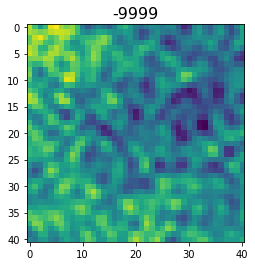

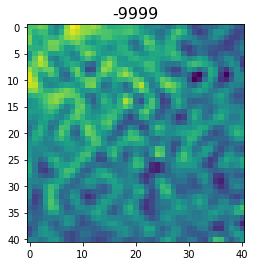

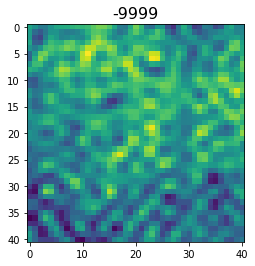

 20%|█▉        | 541/2761 [00:44<02:46, 13.36it/s]

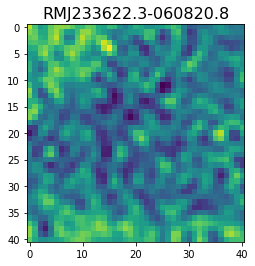

 20%|█▉        | 543/2761 [00:44<02:46, 13.30it/s]

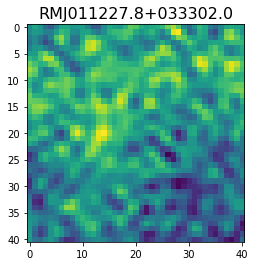

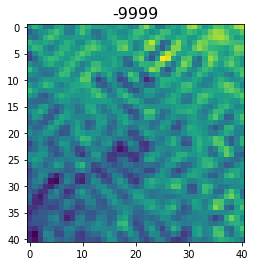

 20%|█▉        | 545/2761 [00:44<03:11, 11.57it/s]

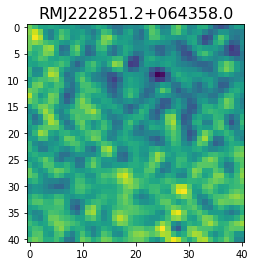

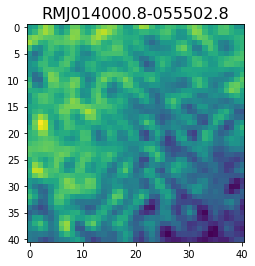

 20%|█▉        | 547/2761 [00:44<03:33, 10.35it/s]

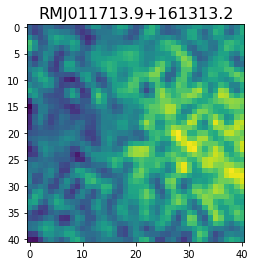

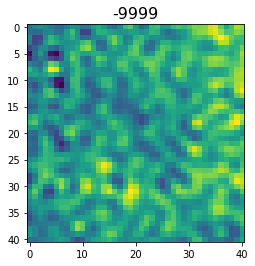

 20%|█▉        | 549/2761 [00:45<03:53,  9.48it/s]

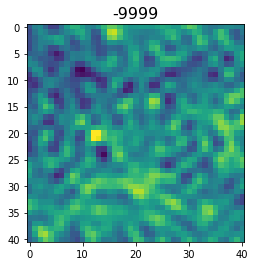

 20%|██        | 553/2761 [00:45<03:22, 10.88it/s]

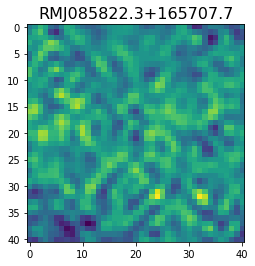

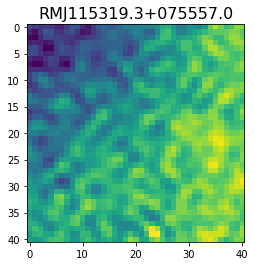

 20%|██        | 555/2761 [00:45<03:55,  9.37it/s]

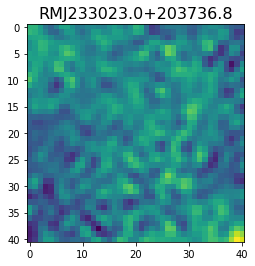

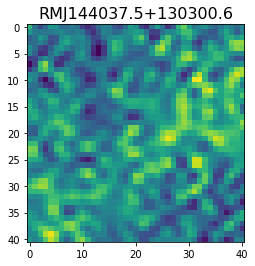

 20%|██        | 557/2761 [00:46<04:11,  8.75it/s]

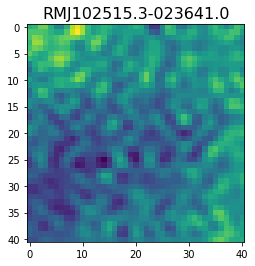

 20%|██        | 559/2761 [00:46<03:55,  9.36it/s]

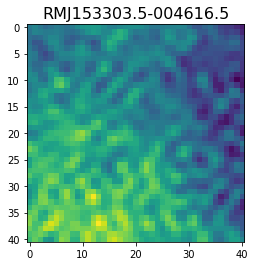

 20%|██        | 563/2761 [00:46<03:04, 11.93it/s]

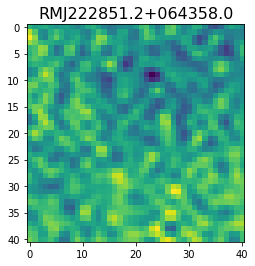

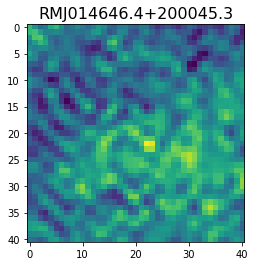

 20%|██        | 565/2761 [00:46<03:29, 10.48it/s]

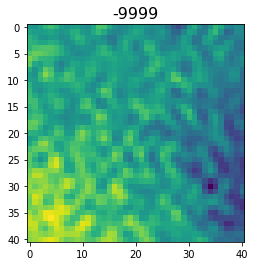

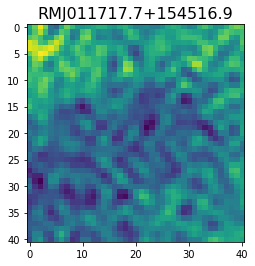

 21%|██        | 567/2761 [00:47<03:53,  9.38it/s]

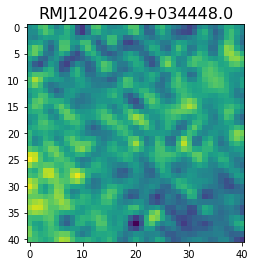

 21%|██        | 568/2761 [00:47<04:02,  9.05it/s]

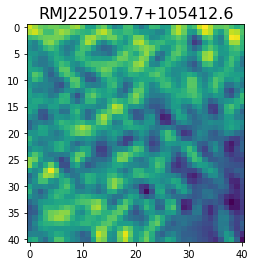

 21%|██        | 570/2761 [00:47<03:41,  9.90it/s]

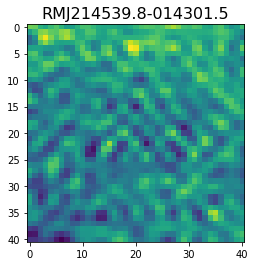

 21%|██        | 572/2761 [00:47<03:51,  9.45it/s]

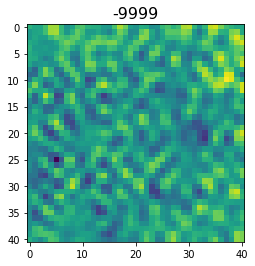

 21%|██        | 573/2761 [00:47<04:05,  8.92it/s]

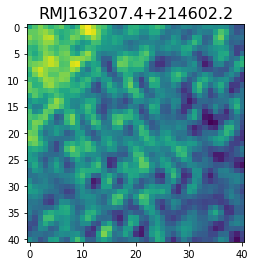

 21%|██        | 575/2761 [00:47<03:48,  9.58it/s]

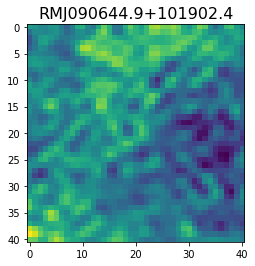

 21%|██        | 577/2761 [00:48<03:46,  9.63it/s]

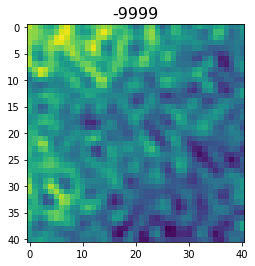

 21%|██        | 578/2761 [00:48<04:05,  8.90it/s]

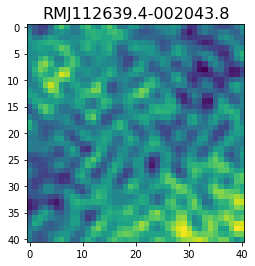

 21%|██        | 579/2761 [00:48<04:43,  7.70it/s]

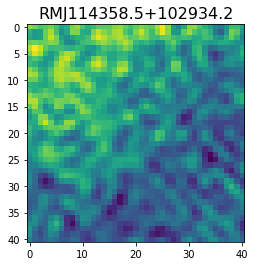

 21%|██        | 580/2761 [00:48<04:50,  7.51it/s]

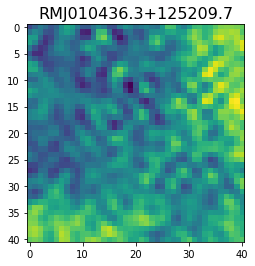

 21%|██        | 581/2761 [00:48<05:05,  7.13it/s]

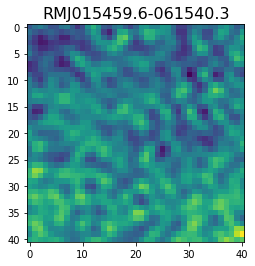

 21%|██        | 586/2761 [00:49<02:58, 12.21it/s]

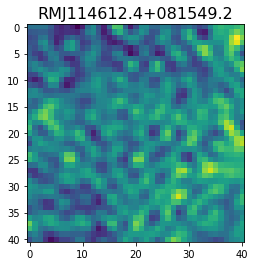

 21%|██▏       | 589/2761 [00:49<02:39, 13.61it/s]

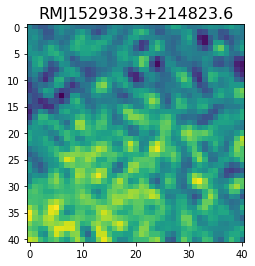

 21%|██▏       | 591/2761 [00:49<02:41, 13.44it/s]

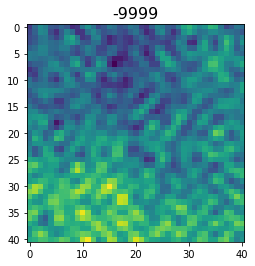

 21%|██▏       | 593/2761 [00:49<02:43, 13.29it/s]

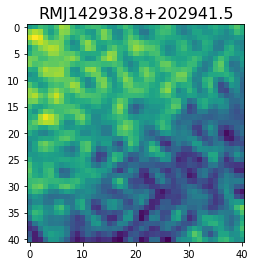

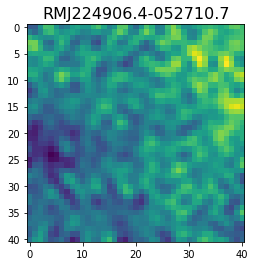

 22%|██▏       | 595/2761 [00:49<03:29, 10.35it/s]

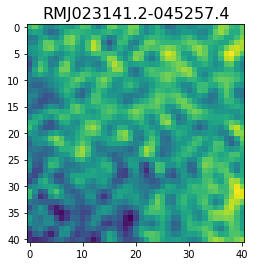

 22%|██▏       | 597/2761 [00:49<03:18, 10.89it/s]

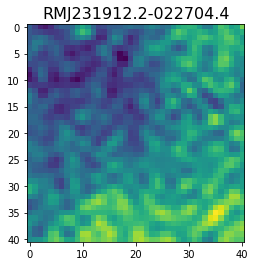

 22%|██▏       | 600/2761 [00:50<02:53, 12.47it/s]

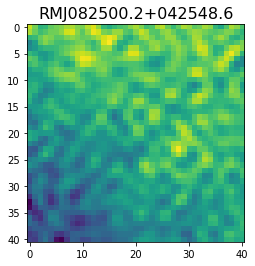

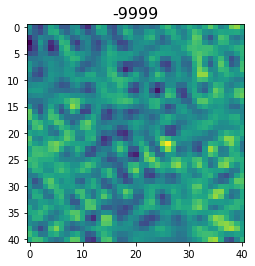

 22%|██▏       | 602/2761 [00:50<03:23, 10.61it/s]

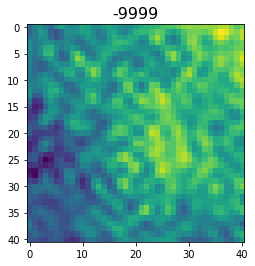

 22%|██▏       | 604/2761 [00:50<03:12, 11.22it/s]

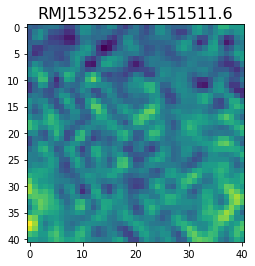

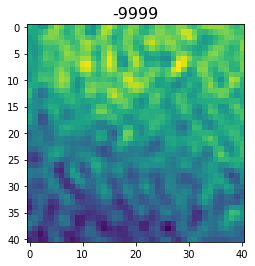

 22%|██▏       | 606/2761 [00:50<03:38,  9.85it/s]

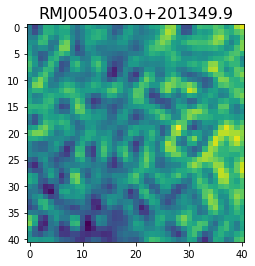

 22%|██▏       | 608/2761 [00:50<03:27, 10.38it/s]

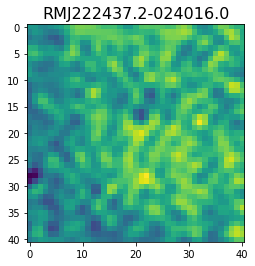

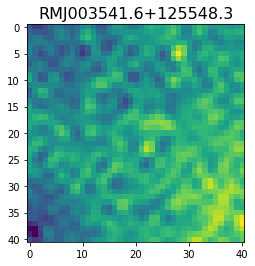

 22%|██▏       | 610/2761 [00:51<03:57,  9.07it/s]

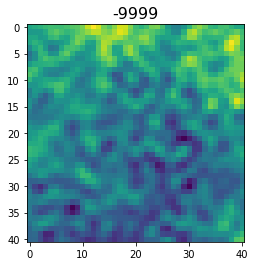

 22%|██▏       | 614/2761 [00:51<03:03, 11.72it/s]

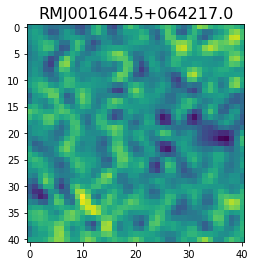

 22%|██▏       | 616/2761 [00:51<03:02, 11.76it/s]

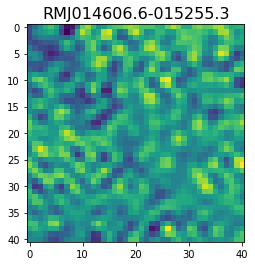

 22%|██▏       | 618/2761 [00:51<03:18, 10.81it/s]

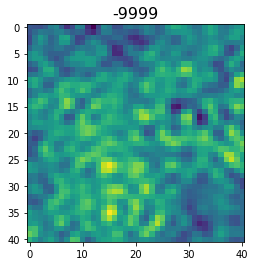

 22%|██▏       | 620/2761 [00:52<03:10, 11.25it/s]

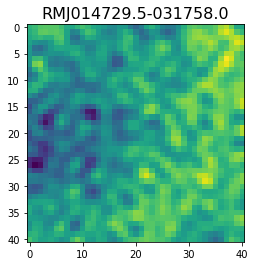

 23%|██▎       | 623/2761 [00:52<02:49, 12.61it/s]

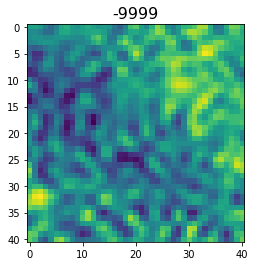

 23%|██▎       | 625/2761 [00:52<02:50, 12.51it/s]

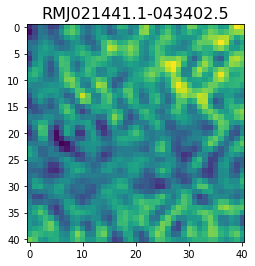

 23%|██▎       | 627/2761 [00:52<02:50, 12.55it/s]

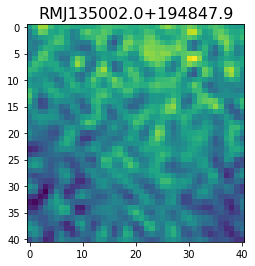

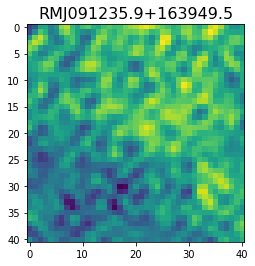

 23%|██▎       | 629/2761 [00:52<03:24, 10.44it/s]

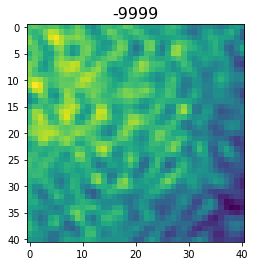

 23%|██▎       | 631/2761 [00:53<03:15, 10.88it/s]

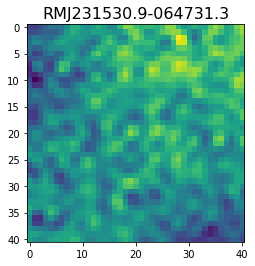

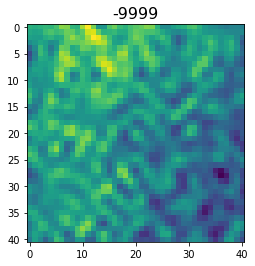

 23%|██▎       | 633/2761 [00:53<03:45,  9.45it/s]

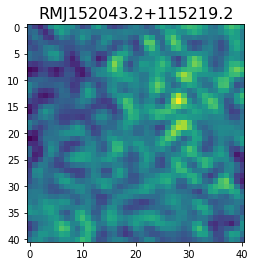

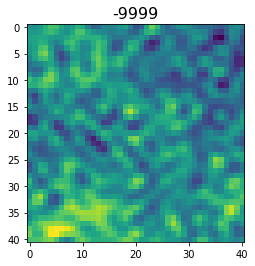

 23%|██▎       | 635/2761 [00:53<04:04,  8.71it/s]

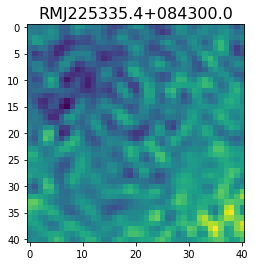

 23%|██▎       | 636/2761 [00:53<04:17,  8.26it/s]

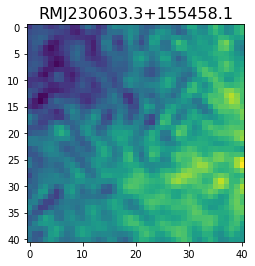

 23%|██▎       | 639/2761 [00:53<03:36,  9.78it/s]

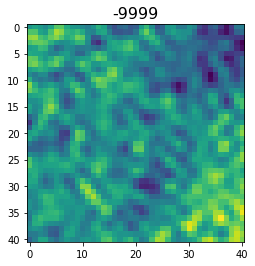

 23%|██▎       | 640/2761 [00:54<03:48,  9.29it/s]

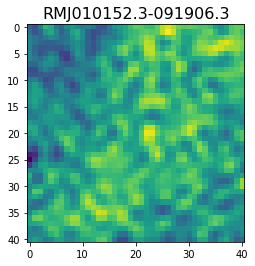

 23%|██▎       | 641/2761 [00:54<04:04,  8.66it/s]

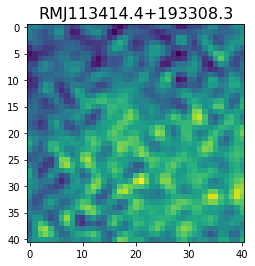

 23%|██▎       | 642/2761 [00:54<04:19,  8.18it/s]

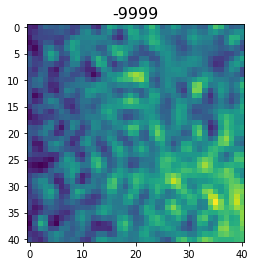

 23%|██▎       | 644/2761 [00:54<03:57,  8.93it/s]

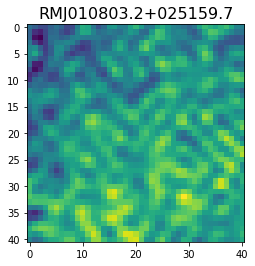

 23%|██▎       | 646/2761 [00:54<03:38,  9.67it/s]

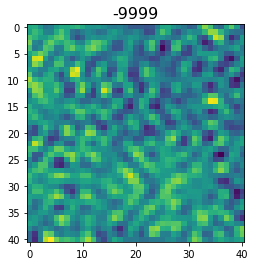

 23%|██▎       | 647/2761 [00:54<03:56,  8.92it/s]

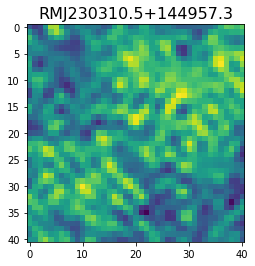

 23%|██▎       | 648/2761 [00:55<04:15,  8.26it/s]

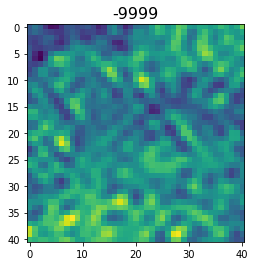

 24%|██▎       | 650/2761 [00:55<03:40,  9.56it/s]

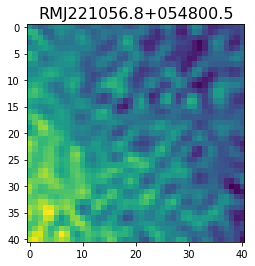

 24%|██▎       | 651/2761 [00:55<03:57,  8.89it/s]

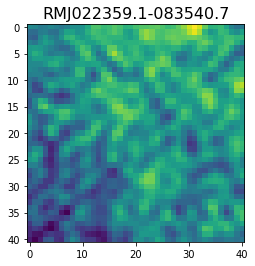

 24%|██▎       | 652/2761 [00:55<04:10,  8.42it/s]

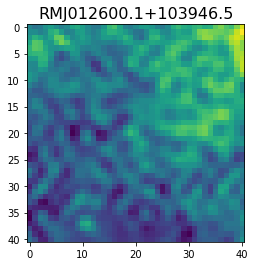

 24%|██▎       | 653/2761 [00:55<04:21,  8.05it/s]

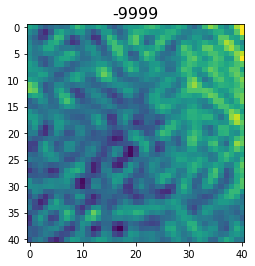

 24%|██▍       | 656/2761 [00:55<03:09, 11.13it/s]

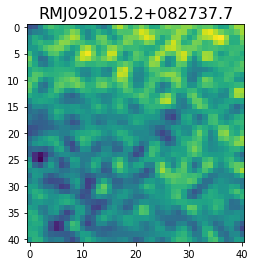

 24%|██▍       | 658/2761 [00:56<03:26, 10.19it/s]

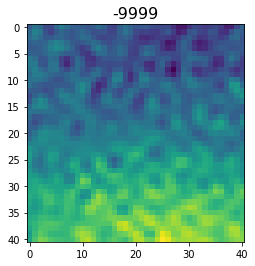

 24%|██▍       | 662/2761 [00:56<02:33, 13.63it/s]

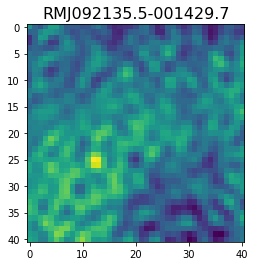

 24%|██▍       | 665/2761 [00:56<02:20, 14.93it/s]

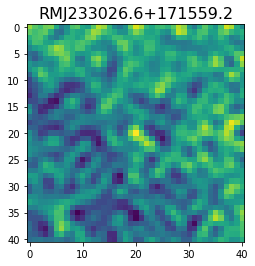

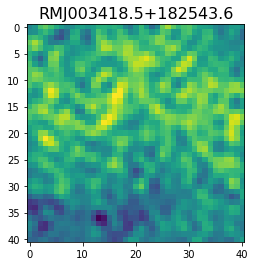

 24%|██▍       | 667/2761 [00:56<02:47, 12.47it/s]

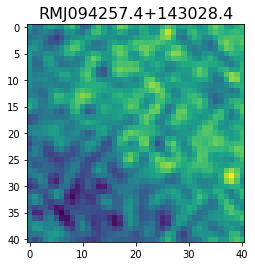

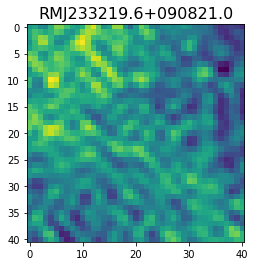

 24%|██▍       | 669/2761 [00:56<03:16, 10.67it/s]

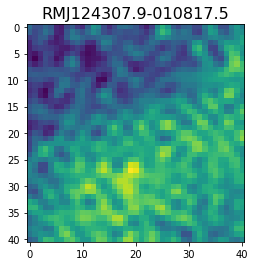

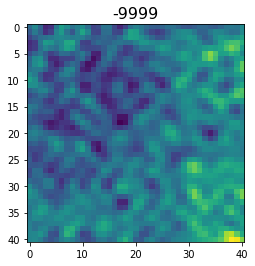

 24%|██▍       | 671/2761 [00:57<03:32,  9.83it/s]

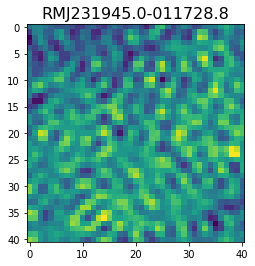

 24%|██▍       | 676/2761 [00:57<02:25, 14.30it/s]

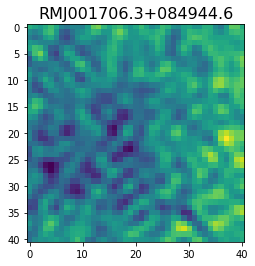

 25%|██▍       | 678/2761 [00:57<02:25, 14.27it/s]

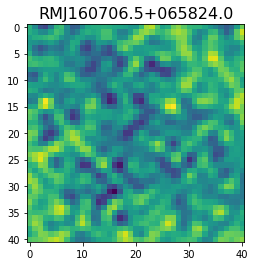

 25%|██▍       | 680/2761 [00:57<02:25, 14.35it/s]

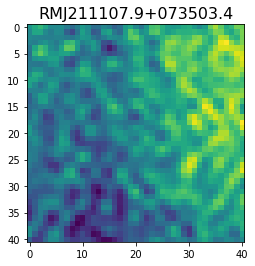

 25%|██▍       | 683/2761 [00:57<02:11, 15.85it/s]

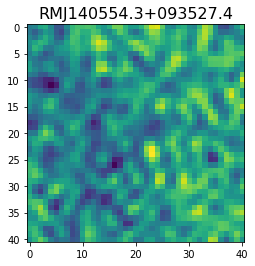

 25%|██▍       | 685/2761 [00:57<02:32, 13.65it/s]

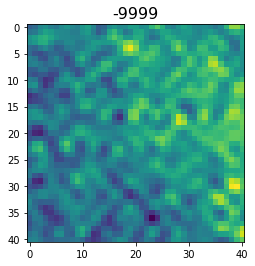

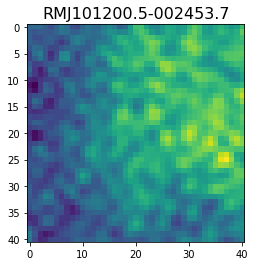

 25%|██▍       | 687/2761 [00:58<02:56, 11.75it/s]

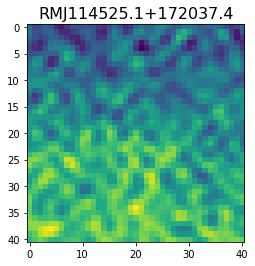

 25%|██▍       | 689/2761 [00:58<02:47, 12.35it/s]

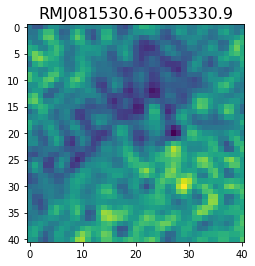

 25%|██▌       | 691/2761 [00:58<02:41, 12.85it/s]

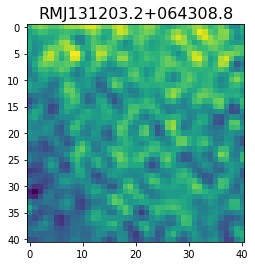

 25%|██▌       | 693/2761 [00:58<02:35, 13.29it/s]

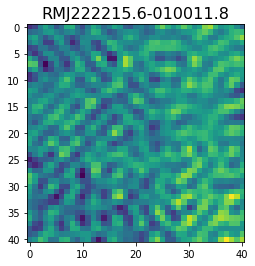

 25%|██▌       | 695/2761 [00:58<02:31, 13.67it/s]

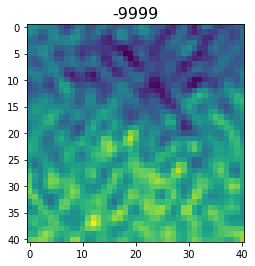

 25%|██▌       | 697/2761 [00:58<02:27, 13.97it/s]

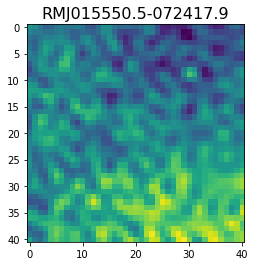

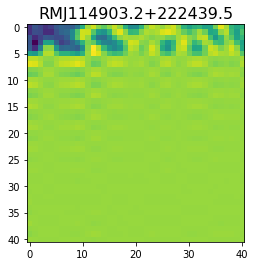

 25%|██▌       | 699/2761 [00:59<02:56, 11.67it/s]

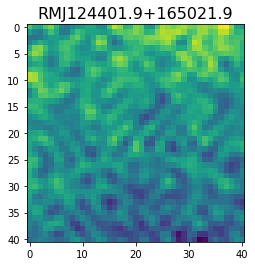

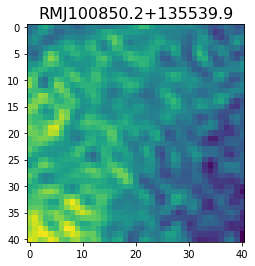

 25%|██▌       | 701/2761 [00:59<03:18, 10.40it/s]

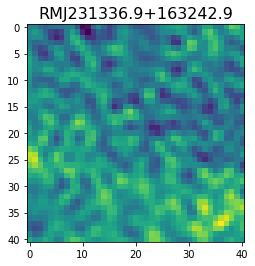

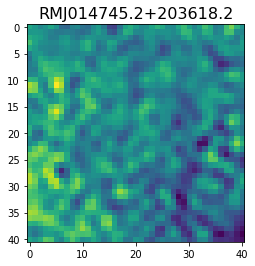

 25%|██▌       | 703/2761 [00:59<03:53,  8.81it/s]

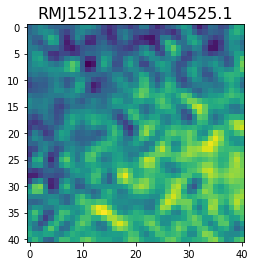

 25%|██▌       | 704/2761 [00:59<03:54,  8.76it/s]

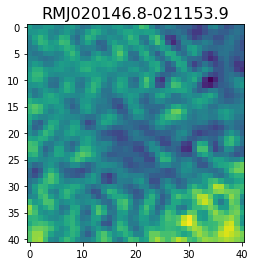

 26%|██▌       | 707/2761 [00:59<02:58, 11.48it/s]

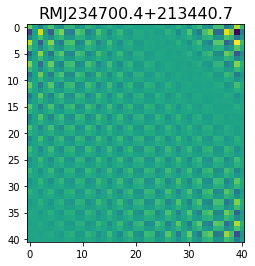

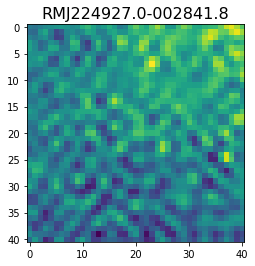

 26%|██▌       | 709/2761 [01:00<03:19, 10.29it/s]

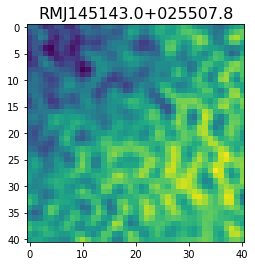

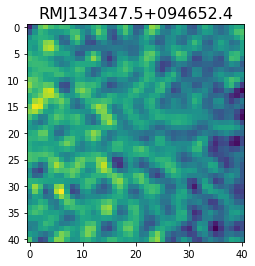

 26%|██▌       | 711/2761 [01:00<03:32,  9.63it/s]

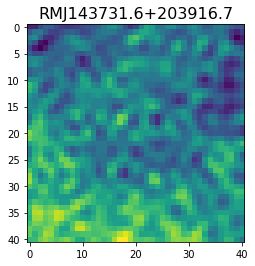

 26%|██▌       | 713/2761 [01:00<03:10, 10.72it/s]

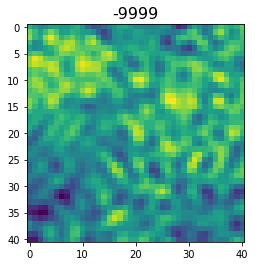

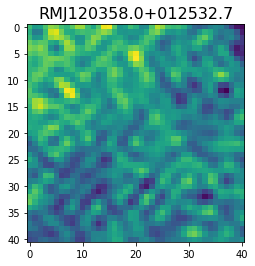

 26%|██▌       | 715/2761 [01:00<03:24, 10.01it/s]

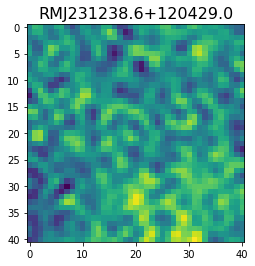

 26%|██▌       | 717/2761 [01:00<03:03, 11.12it/s]

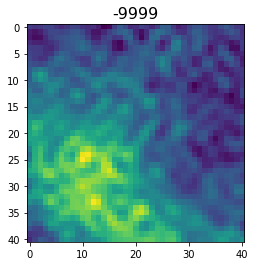

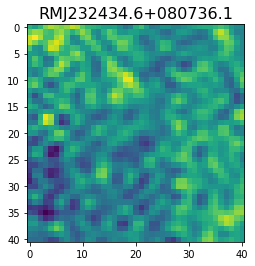

 26%|██▌       | 719/2761 [01:01<03:23, 10.03it/s]

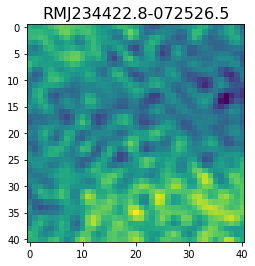

 26%|██▌       | 721/2761 [01:01<03:32,  9.59it/s]

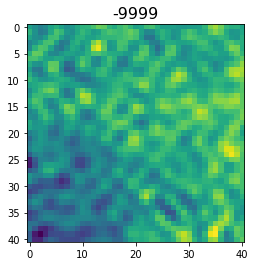

 26%|██▌       | 723/2761 [01:01<03:10, 10.72it/s]

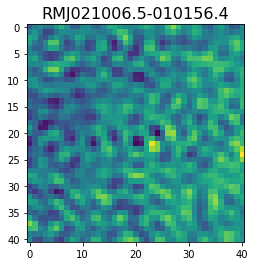

 26%|██▋       | 725/2761 [01:01<02:56, 11.56it/s]

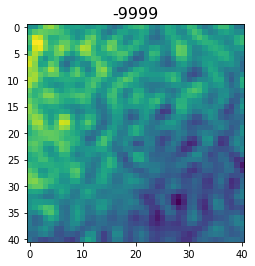

 26%|██▋       | 727/2761 [01:01<02:44, 12.36it/s]

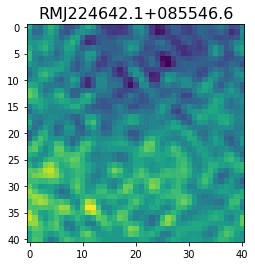

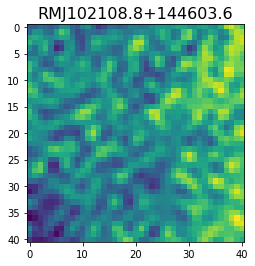

 26%|██▋       | 729/2761 [01:02<03:21, 10.08it/s]

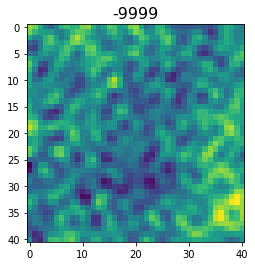

 26%|██▋       | 731/2761 [01:02<03:03, 11.05it/s]

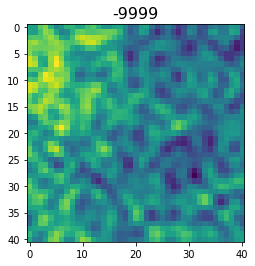

 27%|██▋       | 733/2761 [01:02<02:53, 11.72it/s]

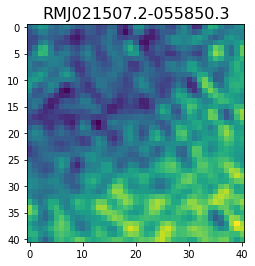

 27%|██▋       | 736/2761 [01:02<02:25, 13.89it/s]

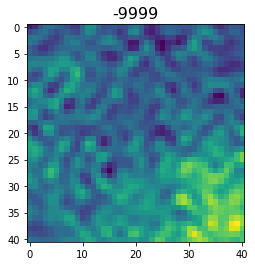

 27%|██▋       | 738/2761 [01:02<02:27, 13.69it/s]

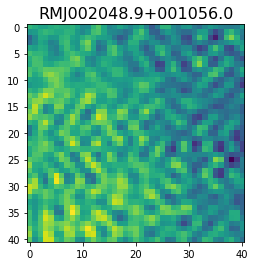

 27%|██▋       | 745/2761 [01:02<01:39, 20.21it/s]

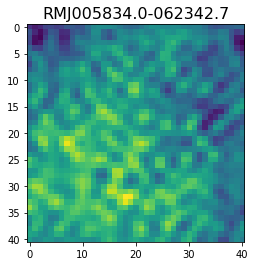

 27%|██▋       | 749/2761 [01:03<02:49, 11.86it/s]


KeyboardInterrupt: 

In [9]:
stamps90 = []

# ras  = arw_not_adv['amf_ra']
# decs = arw_not_adv['amf_dec']
# ras  = arw_not_adv[arw_not_adv.amf_rh>50]['amf_ra']
# decs = arw_not_adv[arw_not_adv.amf_rh>50]['amf_dec']
ras  = amf[amf.amf_rh>50]['amf_ra']
decs = amf[amf.amf_rh>50]['amf_dec']

N = len(ras)
# N=200
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(actmap,coords = np.deg2rad([decs[i], ras[i]]),r=5*utils.arcmin)
#     stamp_1arc = reproject.thumbnails(actmap,coords = np.deg2rad([decs[i], ras[i]]),r=5*utils.arcmin)
    
    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue
        
    stamps90.append(sum(sum(stamp[0])))
    
    stack_CMB_kSZ += stamp 
    c += 1
    plt.imshow(stamp[0])
    plt.title(amf.iloc[i]['red_id'], fontsize = 16)
#     plt.savefig('ex{}.png'.format(i))
    plt.show()
    
# Normalize the stamps
stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

In [ ]:
np.average(stamps90)

In [ ]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size']=13
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stix'
plt.rcParams['figure.figsize']= (6.5,4)
plt.rcParams['figure.dpi']=150
plt.rcParams['axes.facecolor'] = 'white'

freq = [90,150,220]
full = [-710,-610,615]
highrh = [-1305,-1760,-595]
plt.scatter(freq,highrh,marker='x',c='r')
plt.xlabel("Frequency (GHz)")
plt.ylabel("Avg. signal")
plt.title("High richness clusters",size=16)
plt.grid()
plt.savefig('highrh.png')

In [ ]:
# Now we can plot both of these and compare
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ[0])
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

scalebar = AnchoredSizeBar(ax[0].transData,
                           19.8, '', 'center left', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=0.1)

ax[0].add_artist(scalebar)
ax[0].text(1,22,"5 arcmin",color='white')
ax[0].set_title("Stacked sources: 220 GHz", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

plt.show()
plt.savefig("90.png")

---